# **AMS 2022 Short Course -- Machine Learning in Python for Environmental Science Problems: Advanced Topics**
##*An Introduction to Unsupervised Learning*


###**General background info:**

####**Data locations:**
http://portal.nersc.gov/project/dasrepo/AGU_ML_Tutorial/sst.mon.mean.trefadj.anom.detrend.1880to2018.nc
http://portal.nersc.gov/project/dasrepo/AGU_ML_Tutorial/nino34.long.anom.data.txt

OR:
https://drive.google.com/file/d/1ZkzEUgtZ8woNzlfJ2-3tABodbpE8Oytm/view?usp=sharing
https://drive.google.com/file/d/1IMoEnZ3stjQntyZq2Vhkioox4Us2O4ru/view?usp=sharing

####**Contact Info:** tc.chakraborty@pnnl.gov

Based on the tutorial created by Benjamin A. Toms for the AMS 2020 Short Course


# What is Unsupervised Learning?

A large fraction of machine learning is supervised learning, where models are trained using labelled training data to learn patterns. Unsupervised learning is the ability of machine learning models to sort ungrouped information without explicit supervision or training. 

Very exciting for scientific research since we can potentially discover physically meaningful patterns within our data without any prior knowledge about the patterns. 

Thus, unsupervised machine learning can guide new scientific hypotheses that might not stem directly from our current axioms and assumptions about reality.

Although unsupervised pattern recognition has been used for decades, modern machine learning algorithms offer new and exciting ways to discover patterns within data, and extend upon the methods of the previous decades.

<h3 align="center">Machine Learning Algorithms 

<h3 align="center"><img src='https://docs.google.com/uc?export=download&id=10h6lGfXn5EdwXiF8QMkWchXLFv4bN2uZ' width="700"/>

<h3 align="center">Image credit: Hamid Kamangir



During this tutorial, we will learn the basics of a few types of unsupervised learning algorithms. This is meant to provide you a baseline level of information and provide enough resources to explore these methods further for your own research. We will also give an overview of the coding structure for each of the methods. Drawing from the steps provided below, you can focus primarily on scientific problems rather than coding syntax both during and after the tutorial.


We will cover the following methods:


1.   Pattern separation methods (clustering)

> * K-means clustering and hierarchical clustering
> * Self-organizing maps

2.   Pattern extraction methods (dimensionality reduction)
> * Principal component analysis
> * Autoencoders

We're going to be focusing on the high level ideas for each of these methods, and won't dig into the details. Below are some references for additional reading.

# General resources for unsupervised learning
**Additional resources specific to each method are listed following the methods' respective discussions.**

* Wilks, Daniel S. Statistical methods in the atmospheric sciences. Vol. 100. Academic press, 2011.

* Prof. Dennis Hartmann's objective analysis course notes: https://atmos.uw.edu/~dennis/552.index

* Baldi, Pierre. "Autoencoders, unsupervised learning, and deep architectures." Proceedings of ICML workshop on unsupervised and transfer learning. 2012.



---

#<font color='red'>Required: Installing and importing Packages</font>


We will first install packages that we need for this tutorial.

In [ ]:
!pip install netcdf4 #Package for loading in netcdf4 files
!pip install cmocean #Package with beautiful colormaps
!pip install minisom #Package for self organizing maps

#All of these installs are for installing the "cartopy" package, which is helpful for plotting data on the globe
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

     |████████████████████████████████| 223 kB 4.3 MB/s 
  Created wheel for minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8595 sha256=76b2be303034844247d76a584f4947944b6ca336dc1fbfdf62eba6d1262e9ea2
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built minisom
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 32.3 kB of archives.
After this operation, 110 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 32.3 kB in 1s (33.2 kB/s)
Selecting previously unselected 

Now, we'll import some packages that we'll use during various stages of this tutorial. There are comments stating the primary use of these packages.

In [ ]:
#General Python math functions
import math

#Loading in data (including netcdf files)
import xarray as xr

#Handling data as arrays
import numpy as np

#Plotting figures
import matplotlib.pyplot as plt #Main plotting package
from matplotlib import rcParams #For changing text properties
import cmocean #A package with beautiful colormaps
import cartopy #Useful for plotting maps
import cartopy.util #Sub-package requiring separate import

#Making neural networks; Ensure we are using tensorflow 1.15
%tensorflow_version 1.x
import keras

#Non-neural network machine learning/unsupervised learning algorithms
import sklearn.cluster
import scipy.cluster
import sklearn.decomposition

#Self organizing maps
from minisom import MiniSom    

TensorFlow 1.x selected.


Using TensorFlow backend.


#<font color='red'>Required: Removing Auto-Scroll</font>

Output cells will automatically scroll through their entire output unless we use the following code:

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

#<font color='red'>Required: Downloading Data</font>

We'll now download the data from a remote server and temporarily store it on Google Colab.

In [ ]:
!wget http://portal.nersc.gov/project/dasrepo/AGU_ML_Tutorial/sst.mon.mean.trefadj.anom.detrend.1880to2018.nc
!wget http://portal.nersc.gov/project/dasrepo/AGU_ML_Tutorial/nino34.long.anom.data.txt

--2022-01-13 01:14:27--  http://portal.nersc.gov/project/dasrepo/AGU_ML_Tutorial/sst.mon.mean.trefadj.anom.detrend.1880to2018.nc
Resolving portal.nersc.gov (portal.nersc.gov)... 128.55.206.113, 128.55.206.111, 128.55.206.107, ...
Connecting to portal.nersc.gov (portal.nersc.gov)|128.55.206.113|:80... connected.
HTTP request sent, awaiting response... 308 Permanent Redirect
Location: https://portal.nersc.gov/project/dasrepo/AGU_ML_Tutorial/sst.mon.mean.trefadj.anom.detrend.1880to2018.nc [following]
--2022-01-13 01:14:27--  https://portal.nersc.gov/project/dasrepo/AGU_ML_Tutorial/sst.mon.mean.trefadj.anom.detrend.1880to2018.nc
Connecting to portal.nersc.gov (portal.nersc.gov)|128.55.206.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 432481167 (412M) [application/x-netcdf]
Saving to: ‘sst.mon.mean.trefadj.anom.detrend.1880to2018.nc’

sst.mon.mean.trefad 100%[===================>] 412.45M  16.2MB/s    in 24s     

2022-01-13 01:14:52 (17.5 MB/s) - ‘sst.mon.me

In [ ]:
sst_dataset = xr.open_dataset('sst.mon.mean.trefadj.anom.detrend.1880to2018.nc')

#Overview of Data

We will use monthly sea-surface temperature data from the Cobe V2 dataset that has already been pre-processed to have the mean and linear trend removed from each latitude/longitude grid point. The grid resolution is 1 degree by 1 degree, so we will sub-sample the grid so we can train our models faster.

Most of the problems here relate to the El Nino Southern Oscillation (ENSO), which is the dominant pattern of sea-surface temperature variability in the tropics.

A composite perspective of the two phases of ENSO (El Nino and La Nina) is shown below.

![alt text](https://docs.google.com/uc?export=download&id=1w7ZDpgVzV-6noXn1xmEiorB2BFLaTgUF)

So, throughout this tutorial, we'll be using some unsupervised learning techniques to identify these two phase of ENSO, along with some secondary modes of variability. The intent here is not to discover exciting new science, but to gain intuition of what these methods can offer us. That way when we apply them to more complicated problems and understand the limitations and advantages to each method.

As one last remark on ENSO, we can define its evolution according to indices. The index we'll be using today is called the Nino3.4 index, which has been downloaded from the NCAR Climate Data Guide (https://climatedataguide.ucar.edu/climate-data/nino-sst-indices-nino-12-3-34-4-oni-and-tni).

Here's a figure depicting how the Nino3.4 index is defined:

![alt text](https://docs.google.com/uc?export=download&id=1zwvkZHU8hFt1mSbDW5JzIpEoBZKzXXNM)

We'll use this existing definition of ENSO to see if our analyses using the unsupervised machine learning algorithms make physical sense.




#Data Processing (Prior to Training)


We will start by processing our data.

We will first load the datasets using xarray and numpy.

We will also pre-process the data before training the neural network, which we will get to later. Remember that our data has already been processed to remove climatology and any linear trends, so our job here is easier here.

In [ ]:
#Load in the sea-surface temperature data
sst_dataset = xr.open_dataset('sst.mon.mean.trefadj.anom.detrend.1880to2018.nc')
sst = np.array(sst_dataset['sst'])
latitudes = np.array(sst_dataset['lat'])
longitudes = np.array(sst_dataset['lon'])
years = np.linspace(1880, 2019, 12*139 + 1)[:-1] #Create an array for the year of each sample

#Load in the Nino3.4 index
nino_34 = np.loadtxt('nino34.long.anom.data.txt')

#Extract only the tropical Pacific latitudes and longitudes
#   We will use latitudes of 30S to 30N and longitudes of 105E to 300E
latitude_min = np.argmin(np.abs(latitudes - 30))
latitude_max = np.argmin(np.abs(latitudes - -30))
longitude_min = np.argmin(np.abs(longitudes - 105))
longitude_max = np.argmin(np.abs(longitudes - 300))

sst = sst[:, latitude_min:latitude_max, longitude_min:longitude_max]

#Collect the tropical latitudes and longitudes for future plotting
latitudes_tropics = latitudes[latitude_min:latitude_max][::2]
longitudes_tropics = longitudes[longitude_min:longitude_max][::2]

#Sparsify the SST dataset by selecting every other latitude/longitude bin
# This reduces the training time of the models, which is fine for our purposes
sst = sst[:,::2,::2]

#Vectorize the sea-surface temperature data by flattening the matrix along the spatial domains.
#   We vectorize the data because the algorithms we will be using all operate on 1-D data
sst = sst.reshape(sst.shape[0], sst.shape[-2]*sst.shape[-1])

#The sst data has 'nan' values where there is land, but we can not train a network with data that has 'nan values
# So, we will replace all 'nan' values with zeros
sst[np.isnan(sst)] = 0

#Flatten the Nino3.4 time series (it is currently in a year x month matrix), and remove unwanted fields such as column/row labels
nino_34 = nino_34[10:-1,1:].flatten()


#Pattern Separation Techniques (Clustering)

We will first use clustering techniques to separate our dataset into different regimes of variability. 

The clustering methods that we will use separate the data into clusters according to the similarity of each sample. These methods are useful for separating our data and leaving the fields in their pre-processed state.

We can identify the cluster each sample belongs to, which preserves the information within each individual sample. We can also composite across all samples within each cluster which can help remove some of the "noise" if we want to characterize each cluster based on its dominant characteristics.




## K-Means Clustering

K-means clustering is one of the most common types of clustering. This algorithm separates the samples into a specified number of clusters according to the distance between input samples.

The most important details of this method are:


*   The user must prescribe the number of clusters prior to training the model
*   The algorithm typically uses euclidian distance (linear distance) between vectors to identify which cluster a sample belongs to
*   Because of random initialization of each cluster, k-means is not guaranteed to return the same results every time the algorithm is applied when using the same dataset

###Visualizations of K-means convergence

Here's an animation of how k-means iteratively identifies clusters within a dataset:

<br>
<figure>
<center>
<img src='https://docs.google.com/uc?export=download&id=1cbJMAqqFiO7C3FqPh0z2GfT1g-TCUn46' />
<figcaption></figcaption></center>
</figure>
<br>

The white X's show the centroids for each cluster, and the plot on the right shows the sum of squares at each iteration. The sum of squares is the squared euclidian distance between each data point and its respective cluster.

Because the centroids of the nodes are randomly initialized, we can run into a problem where the initialization does not lead to an accurate solution. An example of that is shown below, where the clusters do not identify the four separate clusters simply due to differences in initialization locations for each cluster:

<br>

<br>
<figure>
<center>
<img src='https://docs.google.com/uc?export=download&id=18kVJvdTT_2WQHK8e-228s9TOgeIw2lqu' />
<figcaption></figcaption></center>
</figure>
<br>


You can visually understand that the algorithm isn't separating the clusters how it should, but you can also see that the sum-of-squares metrix plateaus after the first iteration.

The random initialization of k-means is a limitation, and so it is common to run the algorithm multiple times in order to identify the most common solution. The most common solution is then used as the final clustering model.

###So, how many clusters should we use?

If we don't know how many physically meaningful clusters exist within our data before clustering, then how do we know how many clusters to use in our k-means algorithm? This is a good question, and something that partially comes down to your expertise as a scientist, and partially to rules-of-thumb.

One useful rule-of-thumb is called the "elbow" technique. 

In this method, a separate k-means model is trained for a range of numer of clusters, typically ranging from 1 to some upper bound that you define. Then, the summed least squares across all clusters is plotted against the number of clusters used. 

The "elbow" in this plot is the number of clusters at which the decrease in the sum of squares is significantly less after that number than before. If this isn't clear, here's a visual description:

<br>
<figure>
<center>
<img src='https://docs.google.com/uc?export=download&id=1Sr6jKeVOiiRE68oxm4Awy4DwAZY6zABP' />
<figcaption></figcaption></center>
</figure>
<br>

Image source: https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

###References

Here are some references for uses of k-means clustering within atmospheric science:

* Clifton, Andrew, and Julie K. Lundquist. "Data clustering reveals climate impacts on local wind phenomena." Journal of Applied Meteorology and Climatology 51.8 (2012): 1547-1557.

* Robertson, Andrew W., and Michael Ghil. "Large-scale weather regimes and local climate over the western United States." Journal of Climate 12.6 (1999): 1796-1813.

* Steinbach, Michael, et al. "Discovery of climate indices using clustering." Proceedings of the ninth ACM SIGKDD international conference on Knowledge discovery and data mining. ACM, 2003.

### **Let's delve into some code!**

We will first start with a simple clustering approach. We will use two clusters to define the sea-surface temperature patterns within the tropical Pacific. We hope that the clustering will extract the El Nino and La Nina patterns.

In [ ]:
#We will first create a k-means clustering model using scikit learn
kmeans_model = sklearn.cluster.KMeans(n_clusters=2, random_state=10).fit(sst)

#And now we will use this k-means clustering model to identify which cluster each of our samples belongs within
sst_clusters = kmeans_model.fit_predict(sst)

We will now plot the Nino3.4 time series against the time series of the clusters and see how similar they are.

We will only plot the sign of the Nino3.4 index. We are therefore asking whether the clustering algorithm can identify the sign of ENSO.


In [ ]:
#Do some quick pre-processing of the Nino3.4 index
nino_sign = np.sign(nino_34)
nino_sign[nino_sign == -1] = 0
nino_sign = np.abs(nino_sign - 1)
nino_sign

array([1., 1., 1., ..., 0., 0., 0.])

(1880.0, 2018.0)

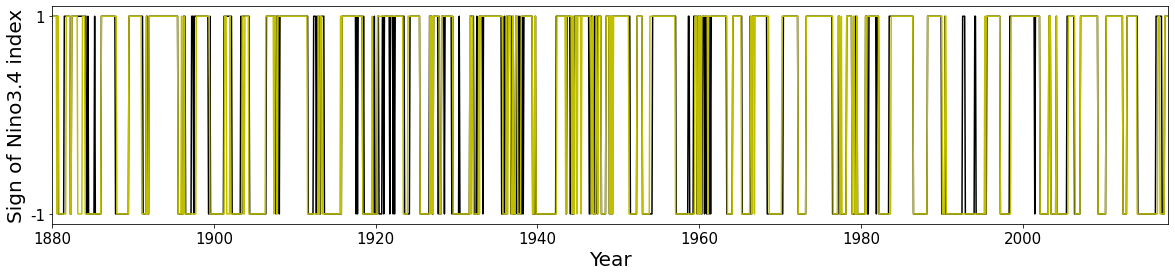

In [ ]:
#Change all future font colors here (changing to light gray for dark mode)
rcParams['text.color'] = 'k'

fig1, ax1 = plt.subplots(figsize=(20,4))

ax1.plot(years, nino_sign, color='k', label='True Nino3.4 Sign')
ax1.plot(years, sst_clusters, color='y', label='KMeans-Identified Sign')

ax1.set_ylabel('Sign of Nino3.4 index', fontsize=20, color='k')
ax1.set_xlabel('Year', fontsize=20, color='k')

ax1.set_yticks([0,1])
ax1.set_yticklabels(['-1','1'])

ax1.set_xticks(np.arange(1880,2020,20))
ax1.set_xticklabels(np.arange(1880,2020,20))

ax1.tick_params(labelsize=15, color='k', labelcolor='k')

ax1.set_xlim(1880, 2018)


In the above plot, we are checking if the black and yellow lines have the same sign. For the most part, it looks like they do, which is great! This means that the K-Means algorithm is able to identify the sign of ENSO with fairly high accuracy. We can calculate that exact accuracy below:

In [ ]:
#Calculate the number of correctly identified ENSO signs using the clustering method
nino_sign = np.sign(nino_34)
nino_sign[nino_sign == -1] = 0
nino_sign = np.abs(nino_sign - 1)

print('The k-means method correctly identifies the sign of ENSO ' + str(np.sum(nino_sign == sst_clusters)/len(nino_sign)*100)[:4] + ' percent of the time.')

The k-means method correctly identifies the sign of ENSO 88.7 percent of the time.


### Visualizing the clusters


So, now we know that the k-means method identifies the phase of ENSO with the accuracy in the above print statement. 

Now, let's make some plots of each of the clusters.

We will first make composite SST maps for each of the clusters.

In [ ]:
#Collect the indices that are associated with each cluster
cluster0_indices = np.argwhere(sst_clusters == 0)[:,0]
cluster1_indices = np.argwhere(sst_clusters == 1)[:,0]

#Now composite across the indices for each cluster
cluster0_composite = np.mean(sst[cluster0_indices], axis=0).reshape(len(latitudes_tropics), len(longitudes_tropics))
cluster1_composite = np.mean(sst[cluster1_indices], axis=0).reshape(len(latitudes_tropics), len(longitudes_tropics))

Text(0, 1.1, 'SST Anomaly ($^{\\circ}$C)')

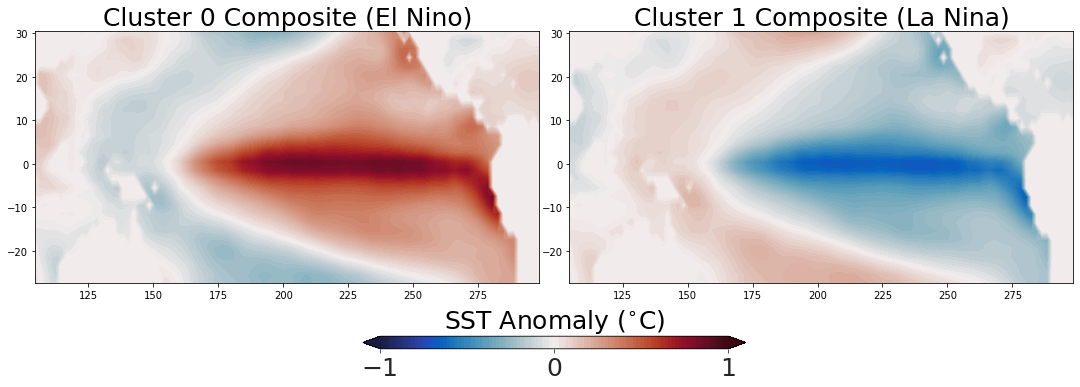

In [ ]:
#Axes instance for the optimal input 
fig1 = plt.figure(figsize=(14,7))

ax = plt.axes((0.0,0.5,0.5,0.5))

#Contour-fill the optimal input
contour_plot_1 = ax.contourf(longitudes_tropics, latitudes_tropics, cluster0_composite, levels=np.linspace(-1,1,100), cmap=cmocean.cm.balance, extend='both')    
#, transform=cartopy.crs.PlateCarree()    

#Change some aspects of the figure
ax.set_title('Cluster 0 Composite (El Nino)', fontsize=25)
#ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='face', facecolor='0.5')
#ax.set_extent([np.min(longitudes_tropics), np.max(longitudes_tropics), np.min(latitudes_tropics), np.max(latitudes_tropics)])


ax = plt.axes((0.53,0.5,0.5,0.5))

#Contour-fill the optimal input
contour_plot_1 = ax.contourf(longitudes_tropics, latitudes_tropics, cluster1_composite, levels=np.linspace(-1,1,100), cmap=cmocean.cm.balance, extend='both')        

#Change some aspects of the figure
ax.set_title('Cluster 1 Composite (La Nina)', fontsize=25)
#ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='face', facecolor='0.5')
#ax.set_extent([np.min(longitudes_tropics), np.max(longitudes_tropics), np.min(latitudes_tropics), np.max(latitudes_tropics)])

cax = fig1.add_axes([0.325, .37, 0.38, 0.025])
cbar = fig1.colorbar(contour_plot_1, cax=cax, orientation='horizontal', ticks=np.linspace(-1,1,3))
cbar.ax.tick_params(labelsize=25, color='0.15', labelcolor='0.15')
cax.text(x=0, y=1.1, s='SST Anomaly ($^{\circ}$C)', rotation=0, ha='center', va='bottom', fontsize=25)


Looks good! The K-Means composites look like what we would expect for the El Nino and La Nina cases.

### Increasing the Number of Clusters

We can further separate the modes of SST variability within the tropics by using more clusters. The interpretation then becomes more complicated, so we will not get into the physical structures the clustering is extracting. But, we can play around with the number of clusters to see what those new clusters do look like.

In [ ]:
#Set a dummy variable for the number of clusters
number_clusters = 4

#We will first create a k-means clustering model using scikit learn
kmeans_model = sklearn.cluster.KMeans(n_clusters=number_clusters, random_state=10).fit(sst)

#And now we will use this k-means clustering model to identify which cluster each of our samples belongs within
sst_clusters = kmeans_model.fit_predict(sst)

#Composite the SST across all of the clusters
cluster_composites = np.zeros((number_clusters, len(latitudes_tropics), len(longitudes_tropics)))
for cluster_number in range(number_clusters):
  cluster_indices = np.argwhere(sst_clusters == cluster_number)[:,0]
  cluster_composite = np.mean(sst[cluster_indices], axis=0).reshape(len(latitudes_tropics), len(longitudes_tropics))
  cluster_composites[cluster_number] = cluster_composite

And now plotting one of the clusters...

You can change the index we are plotting to see what they each look like, if you would like.

Text(0, 1.1, 'SST Anomaly ($^{\\circ}$C)')

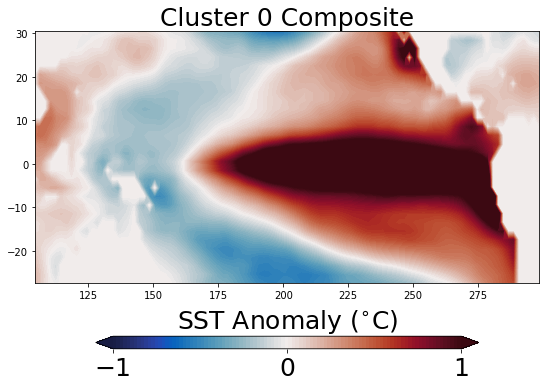

In [ ]:
cluster_to_plot = 0

#Axes instance for the optimal input 
fig1 = plt.figure(figsize=(14,7))

ax = plt.axes((0.0,0.5,0.5,0.5))

#Contour-fill the optimal input
contour_plot_1 = ax.contourf(longitudes_tropics, latitudes_tropics, cluster_composites[cluster_to_plot], 
                             levels=np.linspace(-1,1,100), cmap=cmocean.cm.balance, extend='both')        

#Change some aspects of the figure
ax.set_title('Cluster ' + str(cluster_to_plot) + ' Composite', fontsize=25, color='k')
#ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='face', facecolor='0.5')
ax.set_xlim([np.min(longitudes_tropics), np.max(longitudes_tropics)])
ax.set_ylim([np.min(latitudes_tropics), np.max(latitudes_tropics)])
cax = fig1.add_axes([0.06, 0.37, 0.38, 0.025])
cbar = fig1.colorbar(contour_plot_1, cax=cax, orientation='horizontal', ticks=np.linspace(-1,1,3))
cbar.ax.tick_params(labelsize=25, color='k', labelcolor='k')
cax.text(x=0, y=1.1, s='SST Anomaly ($^{\circ}$C)', rotation=0, ha='center', va='bottom', fontsize=25, color='k')




---



## Hierarchical (Agglomerative) Clustering

Hierarchical clustering, which is also sometimes called agglomerative clustering, is a slightly different type of clustering than K-means. In this case, we are interested in identifying a hierarchy of clusters within our data. 

The hierarchy can be used to identify any number of clusters that the user desires, in increments of 2. This aspect is particularly useful compared to k-means, because we do not need to define the number of clusters prior to training our model.

The most important details of this method are:



*   The user does not need to specify the number of clusters prior to training the model
*   There is no random initialization, and so the clusters will be the same each time the algorithm is applied to a dataset


Here is an animation showing how the clusters change depending on how many clusters you decide to select from the hierarchy:

<br>
<figure>
<center>
<img src='https://docs.google.com/uc?export=download&id=18o1q_ghFZL83uLzhxzLEQU0EFIbfDNNC' />
<figcaption></figcaption></center>
</figure>

Image source: https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/

<br>

We can use similar tests to k-means to decide how many clusters we should use. The elbow approach is a viable solution, which is illustrated in the below plot:

<br>
<figure>
<center>
<img src='https://docs.google.com/uc?export=download&id=1M8yuvgA8nOZVGeHkwQpJtPMvb_foCZY6' />
<figcaption></figcaption></center>
</figure>

Image source: Wilks, Daniel S. Statistical methods in the atmospheric sciences. Vol. 100. Academic press, 2011. Chapter 15.

<br>

In this figure, the "Stage Number" is the number of clusters we have merged. Because there are 26 samples, there is a maximum of 26 clusters. So, a stage number of 26 implies we have one cluster, 25 implies we have two clusters, and so on. 

In this example denodrogram, we would cut the stage number at a value of 21, so would keep 6 clusters.


###References

Here are some example atmospheric science publications that use hierarchical clustering:

* Casola, J.H. and J.M. Wallace, 2007: Identifying Weather Regimes in the Wintertime 500-hPa Geopotential Height Field for the Pacific–North American Sector Using a Limited-Contour Clustering Technique. J. Appl. Meteor. Climatol., 46, 1619–1630.

* Cheng, X. and J.M. Wallace, 1993: Cluster Analysis of the Northern Hemisphere Wintertime 500-hPa Height Field: Spatial Patterns. J. Atmos. Sci., 50, 2674–2696.

* Govender, P., and V. Sivakumar. "Application of k-means and hierarchical clustering techniques for analysis of air pollution: a review (1980-2019)." Atmospheric Pollution Research (2019).

* Johnson, Aaron, et al. "Hierarchical cluster analysis of a convection-allowing ensemble during the Hazardous Weather Testbed 2009 Spring Experiment. Part I: Development of the object-oriented cluster analysis method for precipitation fields." Monthly weather review 139.12 (2011): 3673-3693.




We will now go through the same process we completed for the K-Means example, but this time we will use hierarchical clustering.

In [ ]:
#We will first create a hierarchical clustering model using scikit learn
hierarchical_model = sklearn.cluster.AgglomerativeClustering(n_clusters=2).fit(sst)

#And now we will use this k-means clustering model to identify which cluster each of our samples belongs within
sst_clusters = hierarchical_model.fit_predict(sst)

We will now plot the Nino3.4 time series against the time series of the clusters and see how similar they are.

We will only plot the sign of the Nino3.4 index. We are therefore asking whether the clustering algorithm can identify the sign of ENSO.


In [ ]:
#Do some quick pre-processing of the Nino3.4 index here 
nino_sign = np.sign(nino_34)
nino_sign[nino_sign == -1] = 0
nino_sign = np.abs(nino_sign - 1)

(1880.0, 2018.0)

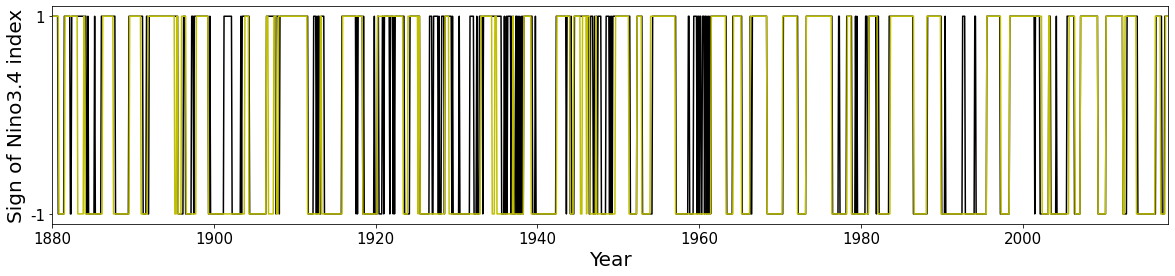

In [ ]:
#Change all future font colors here (changing to light gray for dark mode)
rcParams['text.color'] = 'k'

fig1, ax1 = plt.subplots(figsize=(20,4))

ax1.plot(years, nino_sign, color='k', label='True Nino3.4 Sign')
ax1.plot(years, sst_clusters, color='y', label='KMeans-Identified Sign')

ax1.set_ylabel('Sign of Nino3.4 index', fontsize=20, color='k')
ax1.set_xlabel('Year', fontsize=20, color='k')

ax1.set_yticks([0,1])
ax1.set_yticklabels(['-1','1'])

ax1.set_xticks(np.arange(1880,2020,20))
ax1.set_xticklabels(np.arange(1880,2020,20))

ax1.tick_params(labelsize=15, color='k', labelcolor='k')

ax1.set_xlim(1880, 2018)

In the above plot, we are checking if the black and yellow lines have the same sign. For the most part, it looks like they do, which is great! This means that the K-Means algorithm is able to identify the sign of ENSO with fairly high accuracy. We can calculate that exact accuracy below:

In [ ]:
#Calculate the number of correctly identified ENSO signs using the clustering method
nino_sign = np.sign(nino_34)
nino_sign[nino_sign == -1] = 0
nino_sign = np.abs(nino_sign - 1)

print('The heirarchical clustering method correctly identifies the sign of ENSO ' + str(np.sum(nino_sign == sst_clusters)/len(nino_sign)*100)[:4] + ' percent of the time.')

The heirarchical clustering method correctly identifies the sign of ENSO 83.2 percent of the time.


So, now we know that the heirarchical clustering method identifies the phase of ENSO with the accuracy in the above print statement.

### Visualizing the Clusters

Now, let's make some plots of each of the clusters.

We will first make composite SST maps for each of the clusters.

In [ ]:
#Collect the indices that are associated with each cluster
cluster0_indices = np.argwhere(sst_clusters == 0)[:,0]
cluster1_indices = np.argwhere(sst_clusters == 1)[:,0]

#Now composite across the indices for each cluster
cluster0_composite = np.mean(sst[cluster0_indices], axis=0).reshape(len(latitudes_tropics), len(longitudes_tropics))
cluster1_composite = np.mean(sst[cluster1_indices], axis=0).reshape(len(latitudes_tropics), len(longitudes_tropics))

Text(0, 1.1, 'SST Anomaly ($^{\\circ}$C)')

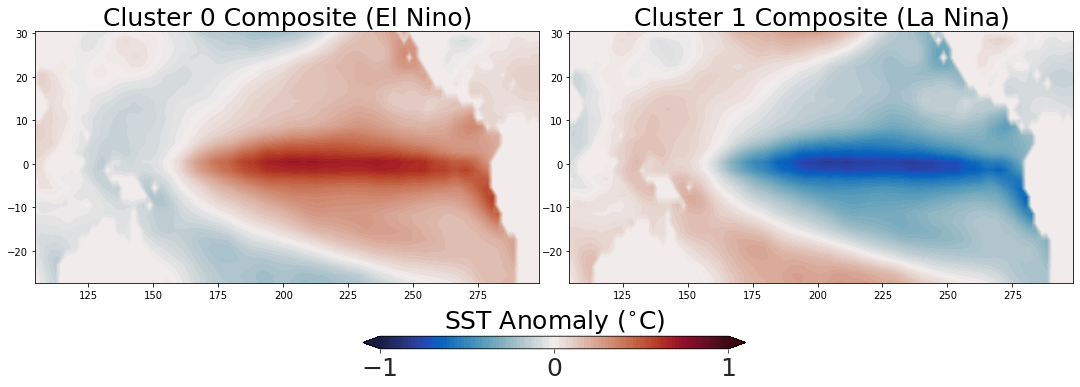

In [ ]:
#Axes instance for the optimal input 
fig1 = plt.figure(figsize=(14,7))

ax = plt.axes((0.0,0.5,0.5,0.5))

#Contour-fill the optimal input
contour_plot_1 = ax.contourf(longitudes_tropics, latitudes_tropics, cluster0_composite, levels=np.linspace(-1,1,100), cmap=cmocean.cm.balance, extend='both')    
#, transform=cartopy.crs.PlateCarree()    

#Change some aspects of the figure
ax.set_title('Cluster 0 Composite (El Nino)', fontsize=25)
#ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='face', facecolor='0.5')
#ax.set_extent([np.min(longitudes_tropics), np.max(longitudes_tropics), np.min(latitudes_tropics), np.max(latitudes_tropics)])


ax = plt.axes((0.53,0.5,0.5,0.5))

#Contour-fill the optimal input
contour_plot_1 = ax.contourf(longitudes_tropics, latitudes_tropics, cluster1_composite, levels=np.linspace(-1,1,100), cmap=cmocean.cm.balance, extend='both')        

#Change some aspects of the figure
ax.set_title('Cluster 1 Composite (La Nina)', fontsize=25)
#ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='face', facecolor='0.5')
#ax.set_extent([np.min(longitudes_tropics), np.max(longitudes_tropics), np.min(latitudes_tropics), np.max(latitudes_tropics)])

cax = fig1.add_axes([0.325, .37, 0.38, 0.025])
cbar = fig1.colorbar(contour_plot_1, cax=cax, orientation='horizontal', ticks=np.linspace(-1,1,3))
cbar.ax.tick_params(labelsize=25, color='0.15', labelcolor='0.15')
cax.text(x=0, y=1.1, s='SST Anomaly ($^{\circ}$C)', rotation=0, ha='center', va='bottom', fontsize=25)


Looks good! The composites look like what we would expect for the El Nino and La Nina cases.

### Increasing the Number of Clusters

We can further separate the modes of SST variability within the tropics by using more clusters. The interpretation then becomes more complicated, so we will not get into the physical structures the clustering is extracting. But, we can play around with the number of clusters to see what those new clusters do look like.

In [ ]:
#Set a dummy variable for the number of clusters
number_clusters = 8

#We will first create a k-means clustering model using scikit learn
hierarchical_model = sklearn.cluster.AgglomerativeClustering(n_clusters=number_clusters).fit(sst)

#And now we will use this k-means clustering model to identify which cluster each of our samples belongs within
sst_clusters = hierarchical_model.fit_predict(sst)  

#Composite the SST across all of the clusters
cluster_composites = np.zeros((number_clusters, len(latitudes_tropics), len(longitudes_tropics)))
for cluster_number in range(number_clusters):
  cluster_indices = np.argwhere(sst_clusters == cluster_number)[:,0]
  cluster_composite = np.mean(sst[cluster_indices], axis=0).reshape(len(latitudes_tropics), len(longitudes_tropics))
  cluster_composites[cluster_number] = cluster_composite

And now plotting one of the clusters...

You can change the index we are plotting to see what they each look like, if you would like.

Text(0, 1.1, 'SST Anomaly ($^{\\circ}$C)')

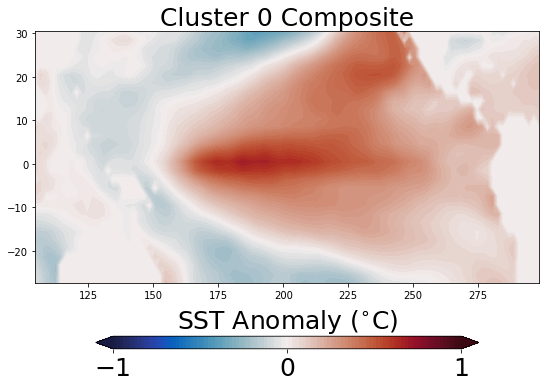

In [ ]:
cluster_to_plot = 0

#Axes instance for the optimal input 
fig1 = plt.figure(figsize=(14,7))

ax = plt.axes((0.0,0.5,0.5,0.5))

#Contour-fill the optimal input
contour_plot_1 = ax.contourf(longitudes_tropics, latitudes_tropics, cluster_composites[cluster_to_plot], 
                             levels=np.linspace(-1,1,100), cmap=cmocean.cm.balance, extend='both')        

#Change some aspects of the figure
ax.set_title('Cluster ' + str(cluster_to_plot) + ' Composite', fontsize=25, color='k')
#ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='face', facecolor='0.5')
ax.set_xlim([np.min(longitudes_tropics), np.max(longitudes_tropics)])
ax.set_ylim([np.min(latitudes_tropics), np.max(latitudes_tropics)])
cax = fig1.add_axes([0.06, 0.37, 0.38, 0.025])
cbar = fig1.colorbar(contour_plot_1, cax=cax, orientation='horizontal', ticks=np.linspace(-1,1,3))
cbar.ax.tick_params(labelsize=25, color='k', labelcolor='k')
cax.text(x=0, y=1.1, s='SST Anomaly ($^{\circ}$C)', rotation=0, ha='center', va='bottom', fontsize=25, color='k')



The scipy package allows you to plot the hierarchical dendrogram, which shows how many samples are within each cluster. The dendrogram can be a useful way to determine how many clusters to retain. 


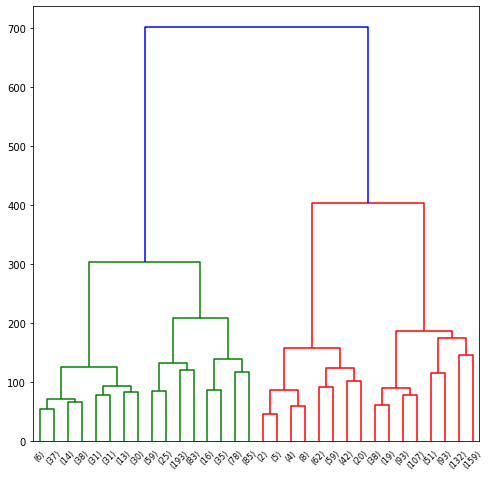

In [ ]:
dendrogram_matrix = scipy.cluster.hierarchy.linkage(sst, 'ward')

plt.figure(figsize=(8,8))
dendrogram = scipy.cluster.hierarchy.dendrogram(dendrogram_matrix, truncate_mode='level', p=4)

## Self Organizing Maps

Another interesting method for pattern separation is self organizing maps (SOM). SOMs are a type of neural network, and their origins are traced back to the 1970s. Lots of research was done using SOMs back in the late 1990's and early 2000's, but there has been a resurgence in their usage with the new era of interest in the popularity of neural networks.

Self organizing maps can be thought of differently than K-means and hierarchical clustering. While K-means and hierarchical clustering identify clusters that correspond with at least one data point, self organizing maps organize a "map" of nodes across all samples, regardless of whether data is associated with each node or not.

This mapping is advantageous because it helps visualize a continuity of similarities between each cluster. But, it is also disadvantageous, because the user must be aware that some of the clusters might not actually be associated with any data and might represent an interpolation between two clusters that correspond with data. 

An animation of how self-organizing maps evolve throughout training is shown below.

<br>
<figure>
<center>
<img src='https://docs.google.com/uc?export=download&id=10e9LvD7G6awW8bChZlZMtY5XT-9lg6kt' />
<figcaption></figcaption></center>
</figure>

Image source: https://commons.wikimedia.org/wiki/File:2D_data_training_SOM.gif

<br>

It is typical for maps to be initiated in a rectangular shape. The nodes of the map are "pulled" towards the data to minimize a metric, typically the euclidian distance between the data points and the nodes.

###References

Here are some resources for self-organizing maps and their usage in atmospheric science:

* Liu, Yonggang, and Robert H. Weisberg. "A review of self-organizing map applications in meteorology and oceanography." (2011): 253.

* Liu, Yonggang, Robert H. Weisberg, and Christopher NK Mooers. "Performance evaluation of the self‐organizing map for feature extraction." Journal of Geophysical Research: Oceans 111.C5 (2006).

* Horton, Daniel E., et al. "Contribution of changes in atmospheric circulation patterns to extreme temperature trends." Nature 522.7557 (2015): 465.

###Training a Self-Organizing Map

We'll train a self organizing map on the sea-surface temperature data.

In [ ]:
#Define the self-organizing map with:
number_x_nodes = 3 #the number of nodes in the x direction
number_y_nodes = 3 #the number of nodes in the y direction
input_len = sst.shape[-1] #the number of sst lat/lon locations

self_organizing_map = MiniSom(x=number_x_nodes, y=number_y_nodes, input_len=input_len, sigma=0.3, learning_rate=0.5) # initialization of 6x6 SOM

#Train the self-organizing map
self_organizing_map.train_random(sst, 1000) # trains the SOM with 100 iterations

We'll now collect the maps for each cluster and plot them.

In [ ]:
#collect the sea-surface temperature maps for each cluster
som_maps = self_organizing_map.get_weights().reshape(number_x_nodes, number_y_nodes, len(latitudes_tropics), len(longitudes_tropics))

And now the plotting code...

Text(0, 1.1, 'SST Anomaly ($^{\\circ}$C)')

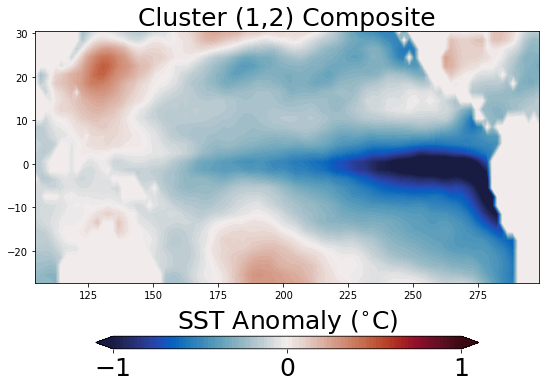

In [ ]:
x_node_to_plot = 1 #Define the x node to plot
y_node_to_plot = 2 #Define the y node to plot

#Axes instance for the optimal input 
fig1 = plt.figure(figsize=(14,7))

ax = plt.axes((0.0,0.5,0.5,0.5))

#Contour-fill the optimal input
contour_plot_1 = ax.contourf(longitudes_tropics, latitudes_tropics, som_maps[x_node_to_plot, y_node_to_plot], 
                             levels=np.linspace(-1,1,100), cmap=cmocean.cm.balance, extend='both')        

#Change some aspects of the figure
ax.set_title('Cluster ' + '(' + str(x_node_to_plot) + ',' + str(y_node_to_plot) + ')' + ' Composite', fontsize=25)
#ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='face', facecolor='0.5')
#ax.set_extent([np.min(longitudes_tropics), np.max(longitudes_tropics), np.min(latitudes_tropics), np.max(latitudes_tropics)], crs=cartopy.crs.PlateCarree())

cax = fig1.add_axes([0.06, 0.37, 0.38, 0.025])
cbar = fig1.colorbar(contour_plot_1, cax=cax, orientation='horizontal', ticks=np.linspace(-1,1,3))
cbar.ax.tick_params(labelsize=25, color='k', labelcolor='k')
cax.text(x=0, y=1.1, s='SST Anomaly ($^{\circ}$C)', rotation=0, ha='center', va='bottom', fontsize=25, color='k')


And now we can test to see whether there are samples associated with each node...

In [ ]:
#Identify the node each sample is associated with
winners = np.array([self_organizing_map.winner(x) for x in sst])

#Initialize the matrix that will hold the count of samples associated with
# each node
winners_matrix = np.zeros((number_x_nodes, number_y_nodes))

#Loop through each node and count the samples
for i in range(number_x_nodes): #Loop through the x indices
  for j in range(number_y_nodes): #Loop through the y indices
    winners_matrix[i,j] = len(np.argwhere( (winners[:,0] == i) & (winners[:,1] == j) ))

print('The following matrix shows the number of samples within each node of the self organizing map:')

print(winners_matrix)

The following matrix shows the number of samples within each node of the self organizing map:
[[117. 192. 242.]
 [135. 203. 125.]
 [162. 206. 286.]]


We can see that for this example, a sample is associated with each node. Good!

---

---


# Pattern Extraction Techniques (Dimensionality Reduction)





---


## Principal component analysis (PCA)

Principal component analysis (PCA) has been used within the geoscientific community for decades! PCA is a way of extracting patterns from data with minimum informational loss while making data easier to interpret and process. The vectors that describe these patterns are all orthogonal to each other, and are linear.

You might be able to see how the requirement of linearity can introduce problems. Some problems in geoscience are linear, but others are not. If we try to describe nonlinear patterns using a linear description, we risk losing information that is important for describing the physics of the pattern.

The most important details of PCA are:


*   Each "principal component" is linear and orthogonal to the others
*   The time-series of each principal component can be used to describe the evolution of the pattern
*   The full field can be reconstructed using all of the principal components, or PCA can be used to remove noise by only reconstructing the patterns using the most prevalent modes of variability

Here is an animation of how PCA works:
<br>
<figure>
<center>
<img src='https://media.giphy.com/media/KRpGtfuxQgCEo/giphy.gif'  width="800">
<figcaption></figcaption></center>
</figure>

In this animation, the red line is updating until it is oriented such that the squared difference between each point and the line is minimized. This animation depicts PCA in an iterative fashion, but the method we will use is deterministic and non-iterative.

Once the first principal component (the red vector) is identified, you can do the same thing to identify the second component, as depicted below:
<br>
<figure>
<center>
<img src='https://www.analyticsvidhya.com/wp-content/uploads/2016/03/2-1-e1458494877196.png'  width="600">
<figcaption></figcaption></center>
</figure>

In these two-dimensional examples, it makes sense that the second principal component is simply orthogonal to the first. However, if we have many dimensions, as is commonly the case in geoscientific data, the orientation of the principal components can be difficult to understand. We'll discuss some visualization techniques that help us understand what each component represents.

###References

Some examples of how principal component analysis has been used in geoscience are below:

* Thompson, D.W.J., and J.M. Wallace, 1998: The Arctic Oscillation signature in the wintertime geopotential height and temperature fields. Geophys. Res. Lett., 25, 1297-1300.
* Wheeler, Matthew C., and Harry H. Hendon. "An all-season real-time multivariate MJO index: Development of an index for monitoring and prediction." Monthly Weather Review 132.8 (2004): 1917-1932.
* Hannachi, A., I. T. Jolliffe, and D. B. Stephenson. "Empirical orthogonal functions and related techniques in atmospheric science: A review." International Journal of Climatology: A Journal of the Royal Meteorological Society 27.9 (2007): 1119-1152.



###Implementing PCA for Our Dataset

We'll now do PCA on the tropical SST field and plot some of the patterns.

We're going to code up PCA in detail so you have intuition of what the algorithm is doing. But, you should also know that there are algorithms that have been optimized for speed available through sci-kit learn, too.

In [ ]:
#Standardize the sst data
sst_standardized = (sst - np.nanmean(sst, axis=1)[:,np.newaxis]) / np.nanstd(sst, axis=1)[:,np.newaxis]

#Calculate the correlation matrix
sst_correlation = 1/len(sst)*sst_standardized.T@sst_standardized

#Perform eigenanalysis
sst_eigenvalues, sst_eigenvectors = np.linalg.eig(sst_correlation)

#Calculate principal components
sst_pcs = sst_standardized@sst_eigenvectors

In [ ]:
#Calculate principal components
sst_pcs = sst_standardized@sst_eigenvectors

#Standardize the principal components
sst_pcs = (sst_pcs - np.mean(sst_pcs, axis=0)) / np.std(sst_pcs, axis=0)

#Calculate the EOFs in physical units
sst_eigenvectors_physical = 1/len(sst)*sst_pcs.T@sst

#Reshape the eigenvectors into the map shape
sst_eigenvectors_physical = sst_eigenvectors_physical.reshape(len(sst_eigenvectors_physical), len(latitudes_tropics), len(longitudes_tropics))
sst_eigenvectors = sst_eigenvectors.reshape(len(sst_eigenvectors), len(latitudes_tropics), len(longitudes_tropics))

#Calculate the variance explained by each eigenvector
sst_eigenvalues_variance = sst_eigenvalues/np.sum(sst_eigenvalues)

### Checking the Results of the Principal Component Analysis

We will now plot the "skree plot", which is just the plot of the variances explained by each principal component. This will help us know how prevalent the dominant patterns within our data are, and will also guide our intuition as we move into more sophisticated methods of unsupervised pattern discovery.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


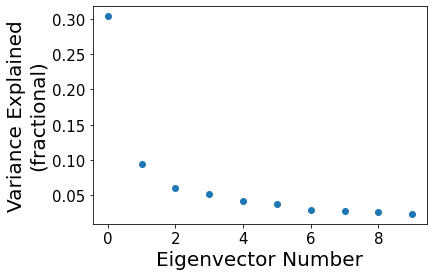

In [ ]:
fig1, ax1 = plt.subplots()

ax1.plot(sst_eigenvalues_variance[:10],'o')

ax1.set_ylabel('Variance Explained\n(fractional)', color='k', fontsize=20)
ax1.set_xlabel('Eigenvector Number', color='k', fontsize=20)

ax1.tick_params(labelsize=15, color='k', labelcolor='k')

We can see that the first eigenvector explains a large amount of the variance -- about thirty percent. This is encouraging, because we know that the ENSO signal is a dominant mode of variability, so it is possible the first eigenvector is capturing the dominant ENSO patterns.

Now we will plot some of the eigenvectors to get a feeling for what types of structures the PCA is extracting.

/usr/local/lib/python3.7/dist-packages/numpy/ma/core.py:2832: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


Text(0, 1.1, 'SST Anomaly ($^{\\circ}$C)')

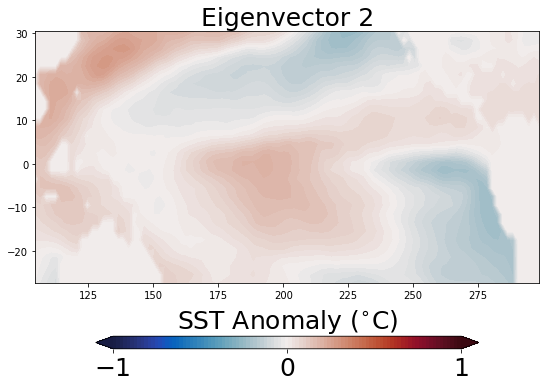

In [ ]:
component_to_plot = 2

#Axes instance for the optimal input 
fig1 = plt.figure(figsize=(14,7))

ax = plt.axes((0.0,0.5,0.5,0.5))

#Contour-fill the optimal input
contour_plot_1 = ax.contourf(longitudes_tropics, latitudes_tropics, sst_eigenvectors_physical[component_to_plot], 
                             levels=np.linspace(-1,1,100), cmap=cmocean.cm.balance, extend='both')        

#Change some aspects of the figure
ax.set_title('Eigenvector ' + str(component_to_plot), fontsize=25)
##ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='face', facecolor='0.5')
#ax.set_extent([np.min(longitudes_tropics), np.max(longitudes_tropics), np.min(latitudes_tropics), np.max(latitudes_tropics)], crs=cartopy.crs.PlateCarree())

cax = fig1.add_axes([0.06, 0.37, 0.38, 0.025])
cbar = fig1.colorbar(contour_plot_1, cax=cax, orientation='horizontal', ticks=np.linspace(-1,1,3))
cbar.ax.tick_params(labelsize=25, color='k', labelcolor='k')
cax.text(x=0, y=1.1, s='SST Anomaly ($^{\circ}$C)', rotation=0, ha='center', va='bottom', fontsize=25, color='k')




---



# Autoencoders

Autoencoders are the most modern algorithm we will be discussing today. Autoencoders are neural networks that extract the dominant patterns of variability within a dataset in an unsupervised manner.

Autoencoders can be thought of similarly as principal component analysis. In fact, a linear autoencoder leads to identical output from principal component analysis.

The most useful aspect of autoencoders for our purposes is their ability to extract nonlinear modes of variability. For nonlinear geophysical processes, these nonlinear representations of our data can be more representative of the processes at play.

The most important details of autoencoders are:

*   They are neural networks
*   If the networks are nonlinear, then the reduced time-series are not orthogonal and are nonlinear
*   The reduced time-series are therefore not necessarily orthogonal, although with some trickery we can ensure we can linearly add them together to reconstruct the original time series


Here's a schematic diagram of what an autoencoder might look like:

<br>

![alt text](https://docs.google.com/uc?export=download&id=1uEaaEJmyScNRw6lX770QKeEZSGtjpPIq)

Image source: Hsieh, William W. "Nonlinear principal component analysis by neural networks." Tellus A 53.5 (2001): 599-615.

<br>

The inputs (x) are transfered through the network toward the bottleneck layer (u), and then back outwards to the output layer (x'). The task of the autoencoder is to reduce the inputs through the hidden layer (h), into the encoded state (u), and then reconstruct as much of the original input as possible using only the encoded state as the output (x').


Here's a visualization of what nonlinear principal component analysis from autoencoders looks like for a case where the input data has 3 dimensions:

<br>

![alt text](https://docs.google.com/uc?export=download&id=1u4MtjvqLtUdkADL-ki2CzO-EV79p0dxy)

Image source: Hsieh, William W. "Nonlinear principal component analysis by neural networks." Tellus A 53.5 (2001): 599-615.

<br>

The x<sub>1</sub>, x<sub>2</sub>, and x<sub>3</sub> values denote the three dimensions of the input data. The dashed line shows the leading linear principal component from standard principal component analysis. The solid black line shows the leading nonlinear principal component from the autoencoder. You can see that the nonlinear principal component captures more of the structure of the data, which can be useful if we don't care about orthogonality.

###References

For more details about autoencoders in geoscience, check out these papers:

* Hsieh, William W. "Nonlinear principal component analysis by neural networks." Tellus A 53.5 (2001): 599-615.

* Monahan, Adam Hugh. "Nonlinear principal component analysis: Tropical Indo–Pacific sea surface temperature and sea level pressure." Journal of Climate 14.2 (2001): 219-233.

* An, Soon-Il, William W. Hsieh, and Fei-Fei Jin. "A nonlinear analysis of the ENSO cycle and its interdecadal changes." Journal of Climate 18.16 (2005): 3229-3239.

* Racah, Evan, et al. "Extremeweather: A large-scale climate dataset for semi-supervised detection, localization, and understanding of extreme weather events." Advances in Neural Information Processing Systems. 2017.

##Defining the Autoencoder

I am assuming you are familiar with the various types of neural network layers,and so I won't go into specifics on what these are. I will, however, focus on some other details such as regularization, that are particularly relevant to geoscience problems for physical reasons.

We will define the autoencoder using the Keras package.

##Defining a Linear Autoencoder

We will also start out with a linear autoencoder, so we can show the similarities between an autoencoder's output and PCA.

If you plot the first eigenvector, you will notice that the pattern is very similar to the ENSO composites from our cluster analysis. This is great! That means our PCA worked.

Cycling through the second through fourth principal components will show you patterns that explain shifts in the locations of the dominant ENSO pattern. For example, the second eigenvector introduces an eastward shifted pattern, and the third eigenvector introduces a pattern shifted toward the central Pacific.

Now that we have an intuition for conventional pattern extraction methods, we'll move on to more modern techniques.

In [ ]:
#Define the input layer of the neural network, which will be our SST dataset
# All we need to do here is tell the neural network the shape of the input
input_layer = keras.layers.Input(shape=(sst.shape[-1],))

#Now we will define the encoder portion of the autoencoder
encoder_layer_1 = keras.layers.Dense(100, activation='linear')(input_layer)
encoder_layer_2 = keras.layers.Dense(50, activation='linear')(encoder_layer_1)

#Defining the encoded layer, which is the centroid of the autoencoder
encoded_layer = keras.layers.Dense(1, activation='linear')(encoder_layer_2)

#Defining the decoder portion of the autoencoder, which we will make a mirror image of
# the encoder portion
decoder_layer_1 = keras.layers.Dense(50, activation='linear')(encoded_layer)
decoder_layer_2 = keras.layers.Dense(100, activation='linear')(decoder_layer_1)

#Defining the final, decoded layer
decoded_layer = keras.layers.Dense(sst.shape[-1], activation='linear')(decoder_layer_2)

#Define the autoencoder. Keras automatically constructs the interior of the network
# so long as the input and output layers are connected through your definitions
# of each layer
autoencoder = keras.models.Model(inputs=input_layer, outputs=decoded_layer)

#Also define the encoder branch of the network -- this object will carry the same
# weights as the encoder portion of the autoencoder object, but can be called
# separately at a later time
encoder = keras.models.Model(inputs=input_layer, outputs=encoded_layer)

#Now compiling the autoencoder
autoencoder.compile(optimizer=keras.optimizers.SGD(lr=.1),
  loss = 'mse', #Our loss function is based on mean squared error
  metrics=[keras.metrics.mse], #We will print out the mean squared error as the network is trained
  )

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


We will now set some parameters that are important for when we train the model.

In [ ]:
batch_size = 32 #The number of samples the network sees before it backpropagates (batch size)
epochs = 50 #The number of times the network will loop through the entire dataset (epochs)
shuffle = True #Set whether to shuffle the training data so the model doesn't see it sequentially 
verbose = 2 #Set whether the model will output information when trained (0 = no output; 2 = output accuracy every epoch)
validation_split = 0.2 #The fraction of samples we will use to validate our model

We will extract validation and training data for the autoencoder. We'll use the middle 20% of the data as validation for simplicity, but there are other methods that are useful for selecting the validation dataset, such as cross-validation.

In [ ]:
#Identify the indices we would like to use for the validation dataset
sst_validation_indices = np.arange(int(len(sst)*0.4), int(len(sst)*0.6))

#Extract the training and validation datasets
sst_training = np.delete(sst, sst_validation_indices, axis=0)
sst_validation = sst[sst_validation_indices]

##Training the Autoencoder

We will now train the autoencoder.

**Remember that each time you retrain the autoencoder, you need to recompile the autoencoder by running the cell two cells above, where we define each layer and then compile.**

In [ ]:
autoencoder.fit(x=sst_training, y=sst_training, validation_data=(sst_validation, sst_validation), epochs=epochs, batch_size=batch_size, shuffle=shuffle)


Train on 1335 samples, validate on 333 samples
Epoch 1/50
1335/1335 [==============================] - 1s 523us/step - loss: 0.2209 - mean_squared_error: 0.2209 - val_loss: 0.1672 - val_mean_squared_error: 0.1672
Epoch 2/50
1335/1335 [==============================] - 0s 286us/step - loss: 0.2205 - mean_squared_error: 0.2205 - val_loss: 0.1671 - val_mean_squared_error: 0.1671
Epoch 3/50
1335/1335 [==============================] - 0s 304us/step - loss: 0.2204 - mean_squared_error: 0.2204 - val_loss: 0.1670 - val_mean_squared_error: 0.1670
Epoch 4/50
1335/1335 [==============================] - 0s 304us/step - loss: 0.2202 - mean_squared_error: 0.2202 - val_loss: 0.1669 - val_mean_squared_error: 0.1669
Epoch 5/50
1335/1335 [==============================] - 0s 305us/step - loss: 0.2199 - mean_squared_error: 0.2199 - val_loss: 0.1666 - val_mean_squared_error: 0.1666
Epoch 6/50
1335/1335 [==============================] - 0s 294us/step - loss: 0.2193 - mean_squared_error: 0.2193 - val_lo

Okay, now let's plot what the time series of the encoded values. This is similar to plotting the principal component time series, except that we are now plotting the time series of the encoding from the autoencoder rather than the output of principal component analysis.

We will first collect the encoding for all of the input samples...

In [ ]:
#Gather the encoded values for each sample by "predicting" from only the encoder
# portion of the trained autoencoder
encoded_values = encoder.predict(sst)[:,0]

#Standardize the encoded values for comparing to the standardized principal components
encoded_values = (encoded_values - np.mean(encoded_values)) / np.std(encoded_values)

...and making the plot...

(1880.0, 2018.0)

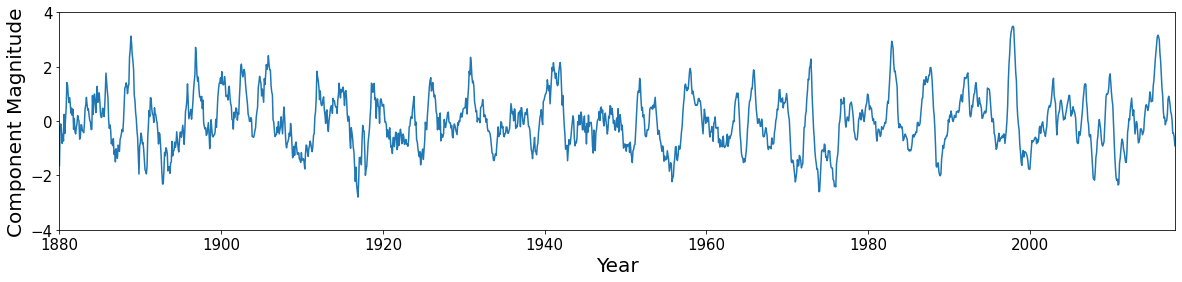

In [ ]:
fig1, ax1 = plt.subplots(figsize=(20,4))

ax1.plot(years, encoded_values)

ax1.set_ylabel('Component Magnitude', fontsize=20, color='k')
ax1.set_xlabel('Year', fontsize=20, color='k')

ax1.set_ylim(-4,4)

ax1.set_xticks(np.arange(1880,2020,20))
ax1.set_xticklabels(np.arange(1880,2020,20))

ax1.tick_params(labelsize=15, color='k', labelcolor='k')

ax1.set_xlim(1880, 2018)

It looks like the pattern we extracted exhibits pronounced oscillations. This is reassuring, since we know that ENSO is also oscillatory.

### Visualizing the Linear Pattern

Let's look at the spatial pattern of the linear pattern by compositing the decoded inputs. We'll composite the decoded outputs for the cases that have negative and positive encoded values separately.

In [ ]:
#Gather the decoded values by passing the inputs through the trained autoencoder
decoded_values = autoencoder.predict(sst)

#Select only the negative encoded samples
decoded_values_pos = decoded_values[encoded_values > 0]

#Select only the positive encoded samples
decoded_values_neg = decoded_values[encoded_values < 0]

#Composite across all samples
decoded_values_pos_composite = np.mean(decoded_values_pos, axis=0).reshape(len(latitudes_tropics), len(longitudes_tropics))
decoded_values_neg_composite = np.mean(decoded_values_neg, axis=0).reshape(len(latitudes_tropics), len(longitudes_tropics))

...and now plotting the positively encoded composite...


Text(0, 1.1, 'SST Anomaly ($^{\\circ}$C)')

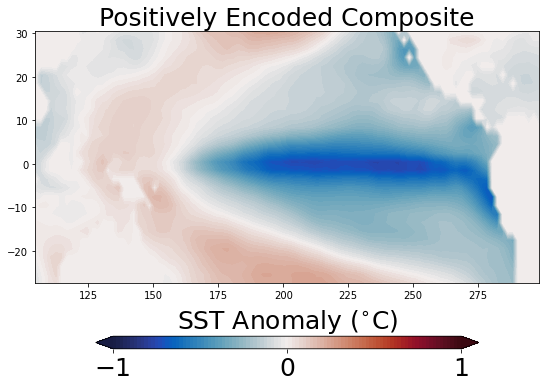

In [ ]:
#Axes instance for the optimal input 
fig1 = plt.figure(figsize=(14,7))

ax = plt.axes((0.0,0.5,0.5,0.5))

contour_plot_1 = ax.contourf(longitudes_tropics, latitudes_tropics, decoded_values_pos_composite, 
                             levels=np.linspace(-1,1,100), cmap=cmocean.cm.balance, extend='both')       

#Change some aspects of the figure
ax.set_title('Positively Encoded Composite', fontsize=25)
#ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='face', facecolor='0.5')
#ax.set_extent([np.min(longitudes_tropics), np.max(longitudes_tropics), np.min(latitudes_tropics), np.max(latitudes_tropics)], crs=cartopy.crs.PlateCarree())

cax = fig1.add_axes([0.06, 0.37, 0.38, 0.025])
cbar = fig1.colorbar(contour_plot_1, cax=cax, orientation='horizontal', ticks=np.linspace(-1,1,3))
cbar.ax.tick_params(labelsize=25, color='k', labelcolor='k')
cax.text(x=0, y=1.1, s='SST Anomaly ($^{\circ}$C)', rotation=0, ha='center', va='bottom', fontsize=25, color='k')



...and now plotting the negatively encoded composite...


Text(0, 1.1, 'SST Anomaly ($^{\\circ}$C)')

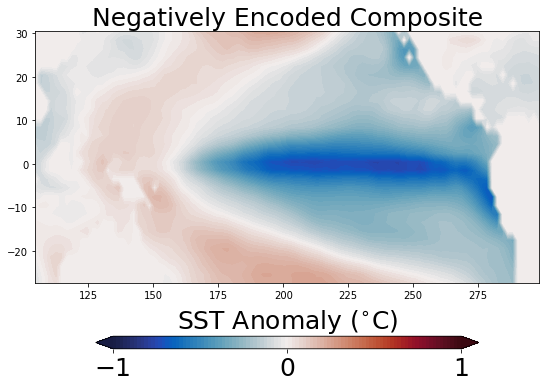

In [ ]:
#Axes instance for the optimal input 
fig1 = plt.figure(figsize=(14,7))

ax = plt.axes((0.0,0.5,0.5,0.5))

contour_plot_1 = ax.contourf(longitudes_tropics, latitudes_tropics, decoded_values_neg_composite, 
                             levels=np.linspace(-1,1,100), cmap=cmocean.cm.balance, extend='both')       

#Change some aspects of the figure
ax.set_title('Negatively Encoded Composite', fontsize=25)
#ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='face', facecolor='0.5')
#ax.set_extent([np.min(longitudes_tropics), np.max(longitudes_tropics), np.min(latitudes_tropics), np.max(latitudes_tropics)], crs=cartopy.crs.PlateCarree())

cax = fig1.add_axes([0.06, 0.37, 0.38, 0.025])
cbar = fig1.colorbar(contour_plot_1, cax=cax, orientation='horizontal', ticks=np.linspace(-1,1,3))
cbar.ax.tick_params(labelsize=25, color='k', labelcolor='k')
cax.text(x=0, y=1.1, s='SST Anomaly ($^{\circ}$C)', rotation=0, ha='center', va='bottom', fontsize=25, color='k')



Great! It looks like our autoencoder picked up on the dominant ENSO signal through its first extraction.

The dominant pattern identified by the autoencoder is very similar to the dominant pattern identified by principal component analysis. This should be the case, since the linear autoencoder is identical to PCA.

###Comparing the Autoencoder and Principal Component Analysis Patterns

We'll make a quick plot below to show the similarity of the autoencoder and prinipal component analysis outputs.

Just like in PCA, the sign of the encodings can vary between trained models and does not necessarily indicate the sign of the ENSO pattern (El Nino or La Nina).

So, I'm going to use a quick trick to make sure we know which sign of the encoded values corresponds to El Nino and La Nina. I can do this because I know that the encoded values do correspond to the phases of ENSO, and I only do this for the sake of illustration for this session.

In [ ]:
#Identify which of the encoding signs is positive or negative by checking the sign
# of the average temperature anomalies within the composite
if np.mean(decoded_values_neg_composite) < 0:
  decoded_values_nina = np.copy(decoded_values_neg_composite)
  decoded_values_nino = np.copy(decoded_values_pos_composite)
else:
  decoded_values_nina = np.copy(decoded_values_pos_composite)
  decoded_values_nino = np.copy(decoded_values_neg_composite)

#Identify which sign of ENSO the positive values of the principal component analysis
# correspond to
if np.mean(sst_eigenvectors_physical[0]) < 0:
  pca_enso_phase = 'La Nina'
else:
  pca_enso_phase = 'El Nino'

#Now organize the decoded values and the prinipal component analysis to compare
# the El Nino values
if pca_enso_phase == 'El Nino':
  pca_el_nino = np.copy(sst_eigenvectors_physical[0])
  pca_la_nina = -1*np.copy(sst_eigenvectors_physical[0])
else:
  pca_el_nino = -1*np.copy(sst_eigenvectors_physical[0])
  pca_la_nina = np.copy(sst_eigenvectors_physical[0])

...and now making the plots comparing the principal component analysis and the autoencoder...

/usr/local/lib/python3.7/dist-packages/numpy/ma/core.py:2832: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


Text(0, 1.1, 'SST Anomaly ($^{\\circ}$C)')

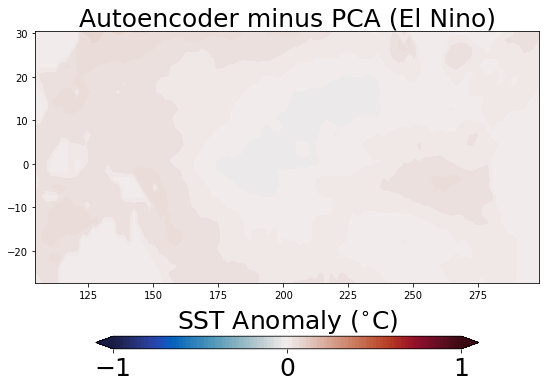

In [ ]:
#Axes instance for the optimal input 
fig1 = plt.figure(figsize=(14,7))

ax = plt.axes((0.0,0.5,0.5,0.5))

contour_plot_1 = ax.contourf(longitudes_tropics, latitudes_tropics, decoded_values_nino/np.max(decoded_values_nino) - pca_el_nino/np.max(pca_el_nino), 
                             levels=np.linspace(-1,1,100), cmap=cmocean.cm.balance, extend='both')       

#Change some aspects of the figure
ax.set_title('Autoencoder minus PCA (El Nino)', fontsize=25)
#ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='face', facecolor='0.5')
#ax.set_extent([np.min(longitudes_tropics), np.max(longitudes_tropics), np.min(latitudes_tropics), np.max(latitudes_tropics)], crs=cartopy.crs.PlateCarree())

cax = fig1.add_axes([0.06, 0.37, 0.38, 0.025])
cbar = fig1.colorbar(contour_plot_1, cax=cax, orientation='horizontal', ticks=np.linspace(-1,1,3))
cbar.ax.tick_params(labelsize=25, color='k', labelcolor='k')
cax.text(x=0, y=1.1, s='SST Anomaly ($^{\circ}$C)', rotation=0, ha='center', va='bottom', fontsize=25, color='k')


The differences between the two are very minor. This means that the autoencoder worked as expected, and we indeed did capture the predominant linear pattern.

##Extracting Additional Patterns of Variability

We can now extract the second most prevalent pattern by subtracting the decoded images from the original SST dataset, and training a new autoencoder on the reduced data.

In [ ]:
#Remove the primary pattern from the sst dataset
sst_autoencoder2 = sst - decoded_values

#And separate the modified sst dataset into training and validation data as we did
# for the first autoencoder
#Identify the indices we would like to use for the validation dataset
sst_validation_indices = np.arange(int(len(sst_autoencoder2)*0.4), int(len(sst_autoencoder2)*0.6))

#Extract the training and validation datasets
sst_autoencoder2_training = np.delete(sst_autoencoder2, sst_validation_indices, axis=0)
sst_autoencoder2_validation = sst_autoencoder2[sst_validation_indices]

...now we will train a new autoencoder...

In [ ]:
#Define the input layer of the neural network, which will be our SST dataset
# All we need to do here is tell the neural network the shape of the input
input_layer = keras.layers.Input(shape=(sst_autoencoder2.shape[-1],))

#Now we will define the encoder portion of the autoencoder
encoder_layer_1 = keras.layers.Dense(10, activation='linear', 
                                     kernel_regularizer=keras.regularizers.l1_l2(l1=0, l2=.0))(input_layer)
encoder_layer_2 = keras.layers.Dense(5, activation='linear',
                                     kernel_regularizer=keras.regularizers.l1_l2(l1=0, l2=0.0))(encoder_layer_1)

#Defining the encoded layer, which is the centroid of the autoencoder
encoded_layer = keras.layers.Dense(1, activation='linear')(encoder_layer_2)

#Defining the decoder portion of the autoencoder, which we will make a mirror image of
# the encoder portion
decoder_layer_1 = keras.layers.Dense(5, activation='linear')(encoded_layer)
decoder_layer_2 = keras.layers.Dense(10, activation='linear',
                                     kernel_regularizer=keras.regularizers.l1_l2(l1=0, l2=0.0))(decoder_layer_1)

#Defining the final, decoded layer
decoded_layer = keras.layers.Dense(sst_autoencoder2.shape[-1], activation='linear',
                                   kernel_regularizer=keras.regularizers.l1_l2(l1=0, l2=.0))(decoder_layer_2)

#Define the autoencoder. Keras automatically constructs the interior of the network
# so long as the input and output layers are connected through your definitions
# of each layer
autoencoder_2 = keras.models.Model(inputs=input_layer, outputs=decoded_layer)

#Also define the encoder branch of the network -- this object will carry the same
# weights as the encoder portion of the autoencoder object, but can be called
# separately at a later time
encoder_2 = keras.models.Model(inputs=input_layer, outputs=encoded_layer)

#Now compiling the autoencoder
autoencoder_2.compile(optimizer=keras.optimizers.SGD(lr=1),
  loss = 'mse', #Our loss function is based on mean squared error
  metrics=[keras.metrics.mse], #We will print out the mean squared error as the network is trained
  )

In [ ]:
batch_size = 32 #The number of samples the network sees before it backpropagates (batch size)
epochs = 50 #The number of times the network will loop through the entire dataset (epochs)
shuffle = True #Set whether to shuffle the training data so the model doesn't see it sequentially 
verbose = 2 #Set whether the model will output information when trained (0 = no output; 2 = output accuracy every epoch)
validation_split = 0.2 #The fraction of samples we will use to validate our model

In [ ]:
autoencoder_2.fit(x=sst_autoencoder2_training, y=sst_autoencoder2_training, validation_data=(sst_autoencoder2_validation, sst_autoencoder2_validation), epochs=epochs, batch_size=batch_size, shuffle=shuffle)

Train on 1335 samples, validate on 333 samples
Epoch 1/50
1335/1335 [==============================] - 0s 249us/step - loss: 0.1233 - mean_squared_error: 0.1233 - val_loss: 0.1019 - val_mean_squared_error: 0.1019
Epoch 2/50
1335/1335 [==============================] - 0s 146us/step - loss: 0.1229 - mean_squared_error: 0.1229 - val_loss: 0.1017 - val_mean_squared_error: 0.1017
Epoch 3/50
1335/1335 [==============================] - 0s 190us/step - loss: 0.1224 - mean_squared_error: 0.1224 - val_loss: 0.1010 - val_mean_squared_error: 0.1010
Epoch 4/50
1335/1335 [==============================] - 0s 150us/step - loss: 0.1205 - mean_squared_error: 0.1205 - val_loss: 0.0990 - val_mean_squared_error: 0.0990
Epoch 5/50
1335/1335 [==============================] - 0s 147us/step - loss: 0.1160 - mean_squared_error: 0.1160 - val_loss: 0.0953 - val_mean_squared_error: 0.0953
Epoch 6/50
1335/1335 [==============================] - 0s 141us/step - loss: 0.1106 - mean_squared_error: 0.1106 - val_los

Okay, now let's plot what the autoencoder extracted once we removed the dominant pattern of variability.

We will first plot the time-series of the encoded value for each sample, as we did for the first autoencoder.

In [ ]:
#Gather the encoded values for each sample by "predicting" from only the encoder
# portion of the trained autoencoder
encoded_values_2 = encoder_2.predict(sst_autoencoder2)[:,0]

#Standardize the encoded values for comparing to the standardized principal components
encoded_values_2 = (encoded_values_2 - np.mean(encoded_values_2)) / np.std(encoded_values_2)

(1880.0, 2018.0)

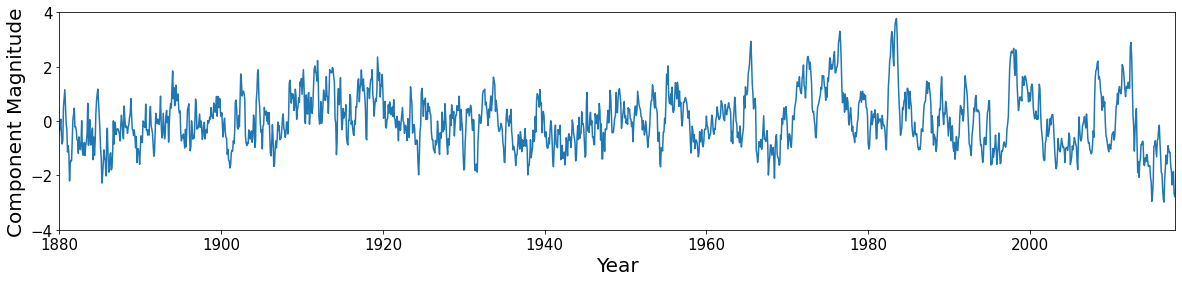

In [ ]:
fig1, ax1 = plt.subplots(figsize=(20,4))

ax1.plot(years, encoded_values_2)
# ax1.plot(years, sst_pcs[:,1])

ax1.set_ylabel('Component Magnitude', fontsize=20, color='k')
ax1.set_xlabel('Year', fontsize=20, color='k')

ax1.set_ylim(-4,4)

ax1.set_xticks(np.arange(1880,2020,20))
ax1.set_xticklabels(np.arange(1880,2020,20))

ax1.tick_params(labelsize=15, color='k', labelcolor='k')

ax1.set_xlim(1880, 2018)

You'll notice that the oscillatory pattern within the second mode of variability is higher frequency than the first and has more noise. This pattern is therefore likely a higher frequency of variability overlain atop the dominant ENSO pattern, although we can't tell from this analysis whether they are directly related or not.

### Visualizing the Secondary Pattern

Let's look at the spatial pattern of this second mode by compositing the decoded inputs. We'll composite the decoded outputs for the cases that have negative and positive encoded values separately.

In [ ]:
#Gather the decoded values by passing the inputs through the trained autoencoder
decoded_values_2 = autoencoder_2.predict(sst_autoencoder2)

#Select only the negative encoded samples
decoded_values_pos_2 = decoded_values_2[encoded_values_2 > 0]

#Select only the positive encoded samples
decoded_values_neg_2 = decoded_values_2[encoded_values_2 < 0]

#Composite across all samples
decoded_values_pos_composite_2 = np.mean(decoded_values_pos_2, axis=0).reshape(len(latitudes_tropics), len(longitudes_tropics))
decoded_values_neg_composite_2 = np.mean(decoded_values_neg_2, axis=0).reshape(len(latitudes_tropics), len(longitudes_tropics))

...and now plotting the positively encoded composite...


Text(0, 1.1, 'SST Anomaly ($^{\\circ}$C)')

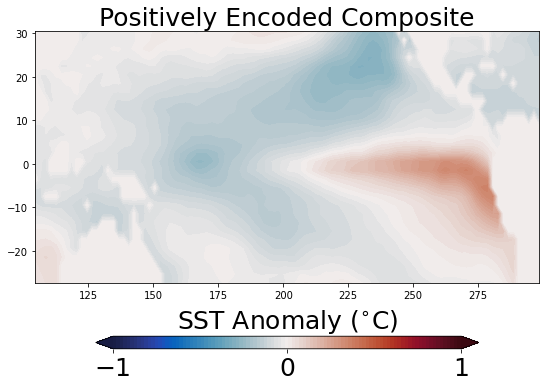

In [ ]:
#Axes instance for the optimal input 
fig1 = plt.figure(figsize=(14,7))

ax = plt.axes((0.0,0.5,0.5,0.5))

contour_plot_1 = ax.contourf(longitudes_tropics, latitudes_tropics, decoded_values_pos_composite_2, 
                             levels=np.linspace(-1,1,100), cmap=cmocean.cm.balance,  extend='both')       

#Change some aspects of the figure
ax.set_title('Positively Encoded Composite', fontsize=25)
#ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='face', facecolor='0.5')
#ax.set_extent([np.min(longitudes_tropics), np.max(longitudes_tropics), np.min(latitudes_tropics), np.max(latitudes_tropics)], crs=cartopy.crs.PlateCarree())

cax = fig1.add_axes([0.06, 0.37, 0.38, 0.025])
cbar = fig1.colorbar(contour_plot_1, cax=cax, orientation='horizontal', ticks=np.linspace(-1,1,3))
cbar.ax.tick_params(labelsize=25, color='k', labelcolor='k')
cax.text(x=0, y=1.1, s='SST Anomaly ($^{\circ}$C)', rotation=0, ha='center', va='bottom', fontsize=25, color='k')



...and now plotting the negatively encoded composite...


Text(0, 1.1, 'SST Anomaly ($^{\\circ}$C)')

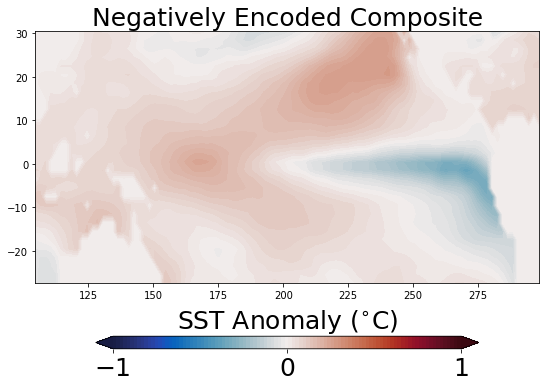

In [ ]:
#Axes instance for the optimal input 
fig1 = plt.figure(figsize=(14,7))

ax = plt.axes((0.0,0.5,0.5,0.5))

contour_plot_1 = ax.contourf(longitudes_tropics, latitudes_tropics, decoded_values_neg_composite_2, 
                             levels=np.linspace(-1,1,100), cmap=cmocean.cm.balance,  extend='both')       

#Change some aspects of the figure
ax.set_title('Negatively Encoded Composite', fontsize=25)
#ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='face', facecolor='0.5')
#ax.set_extent([np.min(longitudes_tropics), np.max(longitudes_tropics), np.min(latitudes_tropics), np.max(latitudes_tropics)], crs=cartopy.crs.PlateCarree())

cax = fig1.add_axes([0.06, 0.37, 0.38, 0.025])
cbar = fig1.colorbar(contour_plot_1, cax=cax, orientation='horizontal', ticks=np.linspace(-1,1,3))
cbar.ax.tick_params(labelsize=25, color='k', labelcolor='k')
cax.text(x=0, y=1.1, s='SST Anomaly ($^{\circ}$C)', rotation=0, ha='center', va='bottom', fontsize=25, color='k')


The second principal component from the autoencoder looks very similar to that from the principal component analysis. So, we can be even more confident that our autoencoder is working as intended: the linear patterns identified by the autoencoder are similar to those from principal component analysis, as theory suggests should be the case.

We can now journey into nonlinear autoencoders.

##Training a Nonlinear Autoencoder

We do not have a full comparison to any other methods for the nonlinear autoencoder, and so we have to trust our physical intuition that the results are correct. Or, if we know the pattern we are trying to identify is mostly linear, we can compare the nonlinear and linear forms and check whether they are at least similar.

We will now do the same thing as for the linear autoencoder, but introduce nonlinearity into the neurons to allow the autoencoder to identify nonlinear patterns.

We will first define the nonlinear autoencoder.

In [ ]:
#Define the input layer of the neural network, which will be our SST dataset
# All we need to do here is tell the neural network the shape of the input
input_layer = keras.layers.Input(shape=(sst.shape[-1],))

#Now we will define the encoder portion of the autoencoder
encoder_layer_1 = keras.layers.Dense(100, activation='relu')(input_layer)
encoder_layer_2 = keras.layers.Dense(50, activation='relu')(encoder_layer_1)

#Defining the encoded layer, which is the centroid of the autoencoder
encoded_layer = keras.layers.Dense(1, activation='linear')(encoder_layer_2)

#Defining the decoder portion of the autoencoder, which we will make a mirror image of
# the encoder portion
decoder_layer_1 = keras.layers.Dense(50, activation='relu')(encoded_layer)
decoder_layer_2 = keras.layers.Dense(100, activation='relu')(decoder_layer_1)

#Defining the final, decoded layer
decoded_layer = keras.layers.Dense(sst.shape[-1], activation='linear')(decoder_layer_2)

#Define the autoencoder. Keras automatically constructs the interior of the network
# so long as the input and output layers are connected through your definitions
# of each layer
autoencoder_nonlinear = keras.models.Model(inputs=input_layer, outputs=decoded_layer)

#Also define the encoder branch of the network -- this object will carry the same
# weights as the encoder portion of the autoencoder object, but can be called
# separately at a later time
encoder_nonlinear = keras.models.Model(inputs=input_layer, outputs=encoded_layer)

#Now compiling the autoencoder
autoencoder_nonlinear.compile(optimizer=keras.optimizers.SGD(lr=1),
  loss = 'mse', #Our loss function is based on mean squared error
  metrics=[keras.metrics.mse], #We will print out the mean squared error as the network is trained
  )

We will now set some parameters that are important for when we train the model.

In [ ]:
batch_size = 32 #The number of samples the network sees before it backpropagates (batch size)
epochs = 50 #The number of times the network will loop through the entire dataset (epochs)
shuffle = True #Set whether to shuffle the training data so the model doesn't see it sequentially 
verbose = 2 #Set whether the model will output information when trained (0 = no output; 2 = output accuracy every epoch)
validation_split = 0.2 #The fraction of samples we will use to validate our model

We will extract validation and training data for the autoencoder. We're doing this for redundancy, but this is the same process we completed as for the linear autoencoder.

We'll use the middle 20% of the data as validation for simplicity, but there are other methods that are useful for selecting the validation dataset, such as cross-validation.

In [ ]:
#Identify the indices we would like to use for the validation dataset
sst_validation_indices = np.arange(int(len(sst)*0.4), int(len(sst)*0.6))

#Extract the training and validation datasets
sst_training = np.delete(sst, sst_validation_indices, axis=0)
sst_validation = sst[sst_validation_indices]

##Training the Nonlinear Autoencoder

We will now train the nonlinear autoencoder.

**Remember that each time you retrain the autoencoder, you need to recompile the autoencoder by running the cell two cells above, where we define each layer and then compile.**

In [ ]:
autoencoder_nonlinear.fit(x=sst_training, y=sst_training, validation_data=(sst_validation, sst_validation), epochs=epochs, batch_size=batch_size, shuffle=shuffle)

Train on 1335 samples, validate on 333 samples
Epoch 1/50
1335/1335 [==============================] - 1s 456us/step - loss: 0.2201 - mean_squared_error: 0.2201 - val_loss: 0.1667 - val_mean_squared_error: 0.1667
Epoch 2/50
1335/1335 [==============================] - 0s 324us/step - loss: 0.2154 - mean_squared_error: 0.2154 - val_loss: 0.1587 - val_mean_squared_error: 0.1587
Epoch 3/50
1335/1335 [==============================] - 0s 299us/step - loss: 0.1831 - mean_squared_error: 0.1831 - val_loss: 0.1380 - val_mean_squared_error: 0.1380
Epoch 4/50
1335/1335 [==============================] - 0s 340us/step - loss: 0.1662 - mean_squared_error: 0.1662 - val_loss: 0.1359 - val_mean_squared_error: 0.1359
Epoch 5/50
1335/1335 [==============================] - 0s 313us/step - loss: 0.1647 - mean_squared_error: 0.1647 - val_loss: 0.1353 - val_mean_squared_error: 0.1353
Epoch 6/50
1335/1335 [==============================] - 0s 309us/step - loss: 0.1638 - mean_squared_error: 0.1638 - val_los

And now we will analyze the time series of the encoded value for each sample for this nonlinear case...

In [ ]:
#Gather the encoded values for each sample by "predicting" from only the encoder
# portion of the trained autoencoder
encoded_values_nonlinear = encoder_nonlinear.predict(sst)[:,0]

#Standardize the encoded values for comparing to the standardized principal components
encoded_values_nonlinear = (encoded_values_nonlinear - np.mean(encoded_values_nonlinear)) / np.std(encoded_values_nonlinear)

(1880.0, 2018.0)

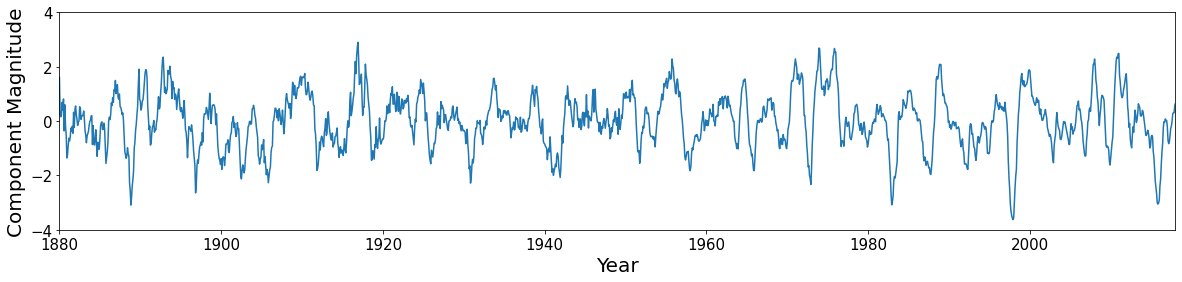

In [ ]:
fig1, ax1 = plt.subplots(figsize=(20,4))

ax1.plot(years, encoded_values_nonlinear)

ax1.set_ylabel('Component Magnitude', fontsize=20, color='k')
ax1.set_xlabel('Year', fontsize=20, color='k')

ax1.set_ylim(-4,4)

ax1.set_xticks(np.arange(1880,2020,20))
ax1.set_xticklabels(np.arange(1880,2020,20))

ax1.tick_params(labelsize=15, color='k', labelcolor='k')

ax1.set_xlim(1880, 2018)

We can see that there is also a pronounced oscillatory pattern within the nonlinear encoded time series. Let's plot the nonlinear and linear encoded time series to see how similar they are.

(1880.0, 2018.0)

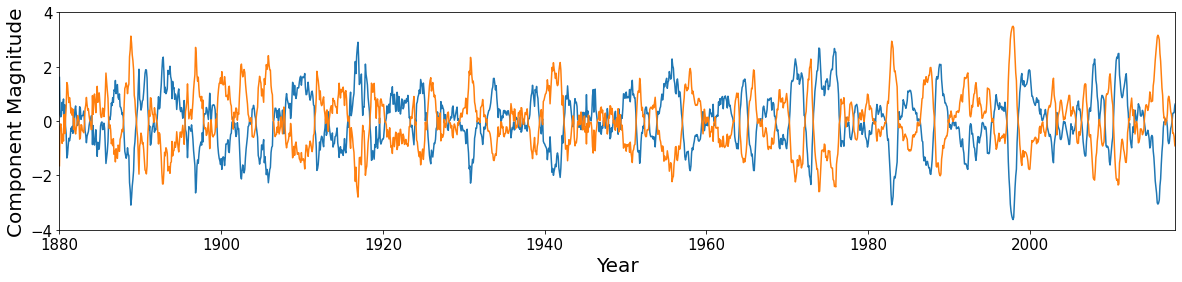

In [ ]:
fig1, ax1 = plt.subplots(figsize=(20,4))

ax1.plot(years, encoded_values_nonlinear)
ax1.plot(years, encoded_values)
#ax1.plot(years, sst_pcs[:,0])

ax1.set_ylabel('Component Magnitude', fontsize=20, color='k')
ax1.set_xlabel('Year', fontsize=20, color='k')

ax1.set_ylim(-4,4)

ax1.set_xticks(np.arange(1880,2020,20))
ax1.set_xticklabels(np.arange(1880,2020,20))

ax1.tick_params(labelsize=15, color='k', labelcolor='k')

ax1.set_xlim(1880, 2018)

You'll notice that the linear and nonlinear time series are very similar. This is actually what we would expect, since ENSO is mainly a linear climate pattern. But, we do know there is a little bit of nonlinearity, and so the minor differences between the time series likely reflect this nonlinearity.

### Visualizing the Nonlinear Pattern

Let's look at the nonlinear spatial pattern. We'll eventually compare the nonlinear and linear patterns.

Let's look at the spatial pattern of the nonlinear mode by compositing the decoded inputs. We'll again composite the decoded outputs for the cases that have negative and positive encoded values separately.

In [ ]:
#Gather the decoded values by passing the inputs through the trained autoencoder
decoded_values_nonlinear = autoencoder_nonlinear.predict(sst)

#Select only the negative encoded samples
decoded_values_pos_nonlinear = decoded_values_nonlinear[encoded_values_nonlinear > 0]

#Select only the positive encoded samples
decoded_values_neg_nonlinear = decoded_values_nonlinear[encoded_values_nonlinear < 0]

#Composite across all samples
decoded_values_pos_composite_nonlinear = np.mean(decoded_values_pos_nonlinear, axis=0).reshape(len(latitudes_tropics), len(longitudes_tropics))
decoded_values_neg_composite_nonlinear = np.mean(decoded_values_neg_nonlinear, axis=0).reshape(len(latitudes_tropics), len(longitudes_tropics))

...and now plotting the positively encoded composite for the nonlinear autoencoder...


Text(0, 1.1, 'SST Anomaly ($^{\\circ}$C)')

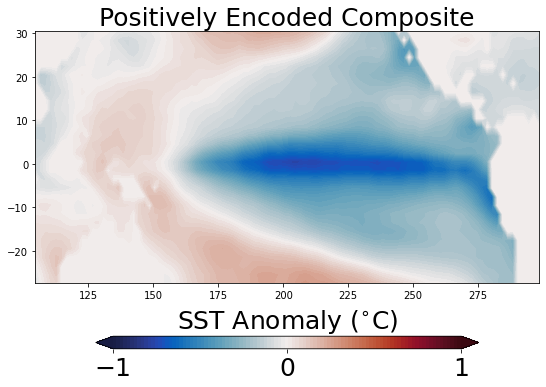

In [ ]:
#Axes instance for the optimal input 
fig1 = plt.figure(figsize=(14,7))

ax = plt.axes((0.0,0.5,0.5,0.5))

contour_plot_1 = ax.contourf(longitudes_tropics, latitudes_tropics, decoded_values_pos_composite_nonlinear, 
                             levels=np.linspace(-1,1,100), cmap=cmocean.cm.balance, extend='both')       

#Change some aspects of the figure
ax.set_title('Positively Encoded Composite', fontsize=25)
#ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='face', facecolor='0.5')
#ax.set_extent([np.min(longitudes_tropics), np.max(longitudes_tropics), np.min(latitudes_tropics), np.max(latitudes_tropics)], crs=cartopy.crs.PlateCarree())

cax = fig1.add_axes([0.06, 0.37, 0.38, 0.025])
cbar = fig1.colorbar(contour_plot_1, cax=cax, orientation='horizontal', ticks=np.linspace(-1,1,3))
cbar.ax.tick_params(labelsize=25, color='k', labelcolor='k')
cax.text(x=0, y=1.1, s='SST Anomaly ($^{\circ}$C)', rotation=0, ha='center', va='bottom', fontsize=25, color='k')


...and now plotting the negatively encoded composite for the nonlinear autoencoder...




Text(0, 1.1, 'SST Anomaly ($^{\\circ}$C)')

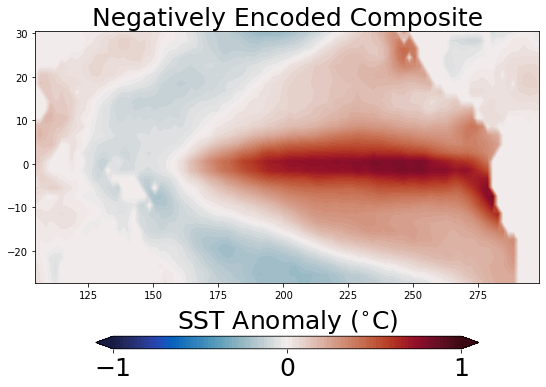

In [ ]:
#Axes instance for the optimal input 
fig1 = plt.figure(figsize=(14,7))

ax = plt.axes((0.0,0.5,0.5,0.5))

contour_plot_1 = ax.contourf(longitudes_tropics, latitudes_tropics, decoded_values_neg_composite_nonlinear, 
                             levels=np.linspace(-1,1,100), cmap=cmocean.cm.balance, extend='both')       

#Change some aspects of the figure
ax.set_title('Negatively Encoded Composite', fontsize=25)
#ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='face', facecolor='0.5')
#ax.set_extent([np.min(longitudes_tropics), np.max(longitudes_tropics), np.min(latitudes_tropics), np.max(latitudes_tropics)], crs=cartopy.crs.PlateCarree())

cax = fig1.add_axes([0.06, 0.37, 0.38, 0.025])
cbar = fig1.colorbar(contour_plot_1, cax=cax, orientation='horizontal', ticks=np.linspace(-1,1,3))
cbar.ax.tick_params(labelsize=25, color='k', labelcolor='k')
cax.text(x=0, y=1.1, s='SST Anomaly ($^{\circ}$C)', rotation=0, ha='center', va='bottom', fontsize=25, color='k')


## Testing the nonlinearity of the identified pattern

We will now compare the patterns identified by the linear and nonlinear principal component analysis. We can make a crude comparison by subtracting the linear mode from the nonlinear mode and observing the difference.

I'm going to use the same trick to identify which sign of the encoding corresponds to El Nino and La Nina so we can compare the linear and nonlinear patterns.

In [ ]:
#Identify which of the encoding signs is positive or negative by checking the sign
# of the average temperature anomalies within the composite
if np.mean(decoded_values_neg_composite_nonlinear) < 0:
  decoded_values_nina_nonlinear = np.copy(decoded_values_neg_composite_nonlinear)
  decoded_values_nino_nonlinear = np.copy(decoded_values_pos_composite_nonlinear)
else:
  decoded_values_nina_nonlinear = np.copy(decoded_values_pos_composite_nonlinear)
  decoded_values_nino_nonlinear = np.copy(decoded_values_neg_composite_nonlinear)

...we will first compare the linear and nonlinear El Nino...

Text(0, 1.1, 'SST Anomaly ($^{\\circ}$C)')

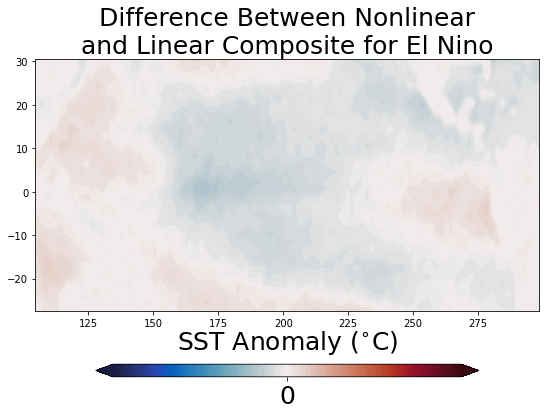

In [ ]:
#Axes instance for the optimal input 
fig1 = plt.figure(figsize=(14,7))

ax = plt.axes((0.0,0.5,0.5,0.5))

contour_plot_1 = ax.contourf(longitudes_tropics, latitudes_tropics, decoded_values_nino_nonlinear/np.max(decoded_values_nino_nonlinear) - decoded_values_nino/np.max(decoded_values_nino), 
                             levels=np.linspace(-.5,.5,100), cmap=cmocean.cm.balance, extend='both') 

#Change some aspects of the figure
ax.set_title('Difference Between Nonlinear\nand Linear Composite for El Nino', fontsize=25)
#ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='face', facecolor='0.5')
#ax.set_extent([np.min(longitudes_tropics), np.max(longitudes_tropics), np.min(latitudes_tropics), np.max(latitudes_tropics)], crs=cartopy.crs.PlateCarree())

cax = fig1.add_axes([0.06, 0.37, 0.38, 0.025])
cbar = fig1.colorbar(contour_plot_1, cax=cax, orientation='horizontal', ticks=np.linspace(-1,1,3))
cbar.ax.tick_params(labelsize=25, color='k', labelcolor='k')
cax.text(x=0, y=1.1, s='SST Anomaly ($^{\circ}$C)', rotation=0, ha='center', va='bottom', fontsize=25, color='k')


...and now we will compare the linear and nonlinear La Nina...

Text(0, 1.1, 'SST Anomaly ($^{\\circ}$C)')

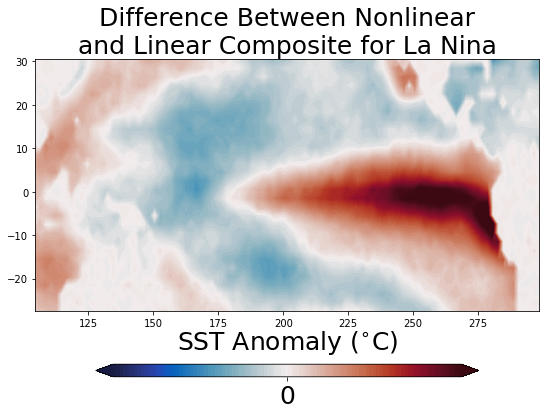

In [ ]:
#Axes instance for the optimal input 
fig1 = plt.figure(figsize=(14,7))

ax = plt.axes((0.0,0.5,0.5,0.5))

contour_plot_1 = ax.contourf(longitudes_tropics, latitudes_tropics, decoded_values_nina_nonlinear/np.max(decoded_values_nina_nonlinear) - decoded_values_nina/np.max(decoded_values_nina), 
                             levels=np.linspace(-.5,.5,100), cmap=cmocean.cm.balance, extend='both') 

#Change some aspects of the figure
ax.set_title('Difference Between Nonlinear\nand Linear Composite for La Nina', fontsize=25)
#ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='face', facecolor='0.5')
#ax.set_extent([np.min(longitudes_tropics), np.max(longitudes_tropics), np.min(latitudes_tropics), np.max(latitudes_tropics)], crs=cartopy.crs.PlateCarree())


cax = fig1.add_axes([0.06, 0.37, 0.38, 0.025])
cbar = fig1.colorbar(contour_plot_1, cax=cax, orientation='horizontal', ticks=np.linspace(-1,1,3))
cbar.ax.tick_params(labelsize=25, color='k', labelcolor='k')
cax.text(x=0, y=1.1, s='SST Anomaly ($^{\circ}$C)', rotation=0, ha='center', va='bottom', fontsize=25, color='k')


By comparing the linear and nonlinear dominant pattern of variability, we can see that El Nino is mainly linear while La Nina exhibits some pronounced nonlinearities. This conclusion is scientifically interesting!

In fact, autoencoders were first used back in the early 2000's when the first wave of neural network excitement arrived. There were some limitations of the study in the 2000s, though, compared to the technique that we learned here.

For more information on autoencoders used for ENSO, check out these papers:

Hsieh, William W. "Nonlinear principal component analysis by neural networks." Tellus A 53.5 (2001): 599-615.

An, Soon-Il, William W. Hsieh, and Fei-Fei Jin. "A nonlinear analysis of the ENSO cycle and its interdecadal changes." Journal of Climate 18.16 (2005): 3229-3239.

#**Final thoughts**

##Unsupervised learning versus supervised learning

###*Advantages*

* Ability to detect unknown patterns in data
* Less complexity due to the lack of data labelling needed
* Real time analysis; does not require manual intervention for training

###*Disadvantages*
* Generally less accurate results
* Hard to validate results, especially for poorly constrained problems
* Lack of specific outpts compared to well-defined supervised methods

#Interactive Section

Now that we've covered the basics of pattern separation and extraction methods, we're going to do the same thing but with the global sea-surface temperature fields rather than the tropical sea-surface temperature.

I don't have a perfect answer for what you should find in this example. This is mostly your chance to feel out the parameter choices for the autoencoder and reproduce what you find from the PCA and clustering algorithms.

I'll prep the data for you, and then this is your journey to explore the methods!

**You might want to reset your notebook before continuing to reset your RAM so your code will faster.**



---

#Installing and importing Packages


We will first install packages that we need for this exercise.

In [ ]:
!pip install netcdf4 #Package for loading in netcdf4 files
!pip install cmocean #Package with beautiful colormaps
!pip install minisom #Package for self organizing maps

#All of these installs are for installing the "cartopy" package, which is helpful for plotting data on the globe
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
proj-bin is already the newest version (4.9.3-2).
proj-data is already the newest version (4.9.3-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


Now, we'll import some packages that we'll use during various stages of the tutorial. Information about each package is given as comments.

In [ ]:
#General Python math functions
import math

#Loading in data (inluding netcdf files)
import xarray as xr

#Handling data
import numpy as np

#Plotting figures
import matplotlib.pyplot as plt #Main plotting package
from matplotlib import rcParams #For changing text properties
import cmocean #A package with beautiful colormaps
import cartopy #Useful for plotting maps
import cartopy.util #Requires separate import

#Making neural networks; Ensure we are using tensorflow 1.15
%tensorflow_version 1.x
import keras

#Non-neural network machine learning/unsupervised learning algorithms
import sklearn.cluster
import scipy.cluster
import sklearn.decomposition

#Self organizing maps
from minisom import MiniSom    

#Removing Auto-Scroll

Output cells will automatically scroll through their entire output unless we use the following code:

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

#Downloading Data

We'll now download the data from a remote server and temporarily store it on Google Colab.

In [ ]:
!wget http://portal.nersc.gov/project/dasrepo/AGU_ML_Tutorial/sst.mon.mean.trefadj.anom.detrend.1880to2018.nc
!wget http://portal.nersc.gov/project/dasrepo/AGU_ML_Tutorial/nino34.long.anom.data.txt

URL transformed to HTTPS due to an HSTS policy
--2022-01-13 02:09:29--  https://portal.nersc.gov/project/dasrepo/AGU_ML_Tutorial/sst.mon.mean.trefadj.anom.detrend.1880to2018.nc
Resolving portal.nersc.gov (portal.nersc.gov)... 128.55.206.108, 128.55.206.107, 128.55.206.112, ...
Connecting to portal.nersc.gov (portal.nersc.gov)|128.55.206.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 432481167 (412M) [application/x-netcdf]
Saving to: ‘sst.mon.mean.trefadj.anom.detrend.1880to2018.nc.1’

sst.mon.mean.trefad 100%[===================>] 412.45M  17.6MB/s    in 85s     

2022-01-13 02:10:55 (4.85 MB/s) - ‘sst.mon.mean.trefadj.anom.detrend.1880to2018.nc.1’ saved [432481167/432481167]

URL transformed to HTTPS due to an HSTS policy
--2022-01-13 02:10:55--  https://portal.nersc.gov/project/dasrepo/AGU_ML_Tutorial/nino34.long.anom.data.txt
Resolving portal.nersc.gov (portal.nersc.gov)... 128.55.206.109, 128.55.206.112, 128.55.206.113, ...
Connecting to portal.nersc.




#Data Processing (Prior to Training)


Okay! Now it's time to start processing our data.

We will first load the datasets using xarray and numpy.

We will also pre-process the data before training the neural network. Remember that our data has already been processed to remove climatology and any linear trends, so our job here is easier.

In [ ]:
#Load in the sea-surface temperature data
sst_dataset = xr.open_dataset('sst.mon.mean.trefadj.anom.detrend.1880to2018.nc')
sst = np.array(sst_dataset['sst'])
latitudes = np.array(sst_dataset['lat'])
longitudes = np.array(sst_dataset['lon'])
years = np.linspace(1880, 2019, 12*139 + 1)[:-1] #Create an array for the year of each sample

#Load in the Nino3.4 index
nino_34 = np.loadtxt('nino34.long.anom.data.txt')

#Extract only the tropical Pacific latitudes and longitudes
#   We will use latitudes of 30S to 30N and longitudes of 105E to 300E
latitude_min = np.argmin(np.abs(latitudes - 30))
latitude_max = np.argmin(np.abs(latitudes - -30))
longitude_min = np.argmin(np.abs(longitudes - 105))
longitude_max = np.argmin(np.abs(longitudes - 300))

#Sparsify the global sea-surface temperature data by selecting every four points
sst = sst[:,::4,::4]

#Vectorize the sea-surface temperature data by flattening the matrix along the spatial domains.
#   We vectorize the data because the algorithms we will be using all operate on 1-D data
sst = sst.reshape(sst.shape[0], sst.shape[-2]*sst.shape[-1])

#The sst data has 'nan' values where there is land, but we can not train a network with data that has 'nan values
# So, we will replace all 'nan' values with zeros
sst[np.isnan(sst)] = 0

#The sst data has 'nan' values where there is land, but we can not train a network with data that has 'nan values
# So, we will replace all 'nan' values with zeros
sst[np.isnan(sst)] = 0


Now get creative with code! Some suggestions:



*   Mimic what we did with the tropical sea-surface temperature data. Try to find regimes of sst variability using the different clustering methods discused above. 

* Try to represent the data in lower dimensions using the dimensionality reduction techniques.

* Compare the linear and nonlinear autoencoder output to test whether the global patterns of sea-surface temperature are more nonlinear than the tropical patterns.



